In [398]:
import causalnex
import networkx as nx
from causalnex.structure.dynotears import from_pandas_dynamic
from causalnex.structure.pytorch.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import torch
import warnings
warnings.filterwarnings('ignore')

In [399]:
df_attack_train = pd.read_csv('../WADI_dataset/WADI_attack_train-V2.csv',index_col=0).reset_index(drop=True)
# df_attack_train.drop(columns='Normal/Attack', inplace=True)
# df_attack_train['Timestamp'] = df_att_timestamp

df_attack_train

,DateTime,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,...,3_MV_001_STATUS,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW
0,2017-10-09 12:30:00,180.587,0.679466,11.8775,429.692,0.241401,1.944250,0,0,65.2802,...,1,1,1,1,1,1,1,61.1898,1,0.83
1,2017-10-09 12:30:01,179.355,0.673468,11.8789,475.694,0.331540,0.001069,0,0,44.0875,...,1,1,1,1,1,1,1,59.1644,1,0.09
2,2017-10-09 12:30:02,168.805,0.649471,11.9345,445.772,0.228501,0.001193,0,0,66.5395,...,1,1,1,1,1,1,1,62.9359,1,0.65
3,2017-10-09 12:30:03,180.135,0.649469,11.9666,445.666,0.222004,0.001184,0,0,70.0280,...,1,1,1,1,1,1,1,60.4739,1,0.20
4,2017-10-09 12:30:04,180.624,0.739460,11.8654,431.460,0.241313,1.944280,0,0,62.3063,...,1,1,1,1,1,1,1,62.4513,1,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,2017-10-09 13:35:45,179.470,0.655468,11.8818,469.183,0.325002,0.001077,0,0,44.0103,...,1,1,1,1,1,1,1,60.2629,1,0.22
3946,2017-10-09 13:35:46,176.283,0.559483,11.9288,477.080,0.331423,0.001266,0,0,57.6642,...,1,1,1,1,1,1,1,59.9849,1,0.45
3947,2017-10-09 13:35:47,168.182,0.589478,11.9590,442.102,0.228091,0.001116,0,0,70.4121,...,1,1,1,1,1,1,1,62.9450,1,0.58
3948,2017-10-09 13:35:48,178.219,0.601475,11.9123,442.135,0.266883,0.001032,0,0,52.5798,...,1,1,1,1,1,1,1,60.5332,1,0.63


In [400]:
df_normal_train = pd.read_csv('../WADI_dataset/WADI_normal_train-V2.csv',index_col=0).reset_index(drop=True)[3000:9000]
df_normal_train

,DateTime,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,...,3_MV_001_STATUS,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW
3000,2017-10-09 00:50:00,180.781,0.709465,11.8915,432.032,0.241223,1.843780,0,0,66.3702,...,1,1,1,1,1,1,1,62.1297,1,0.64
3001,2017-10-09 00:50:01,179.184,0.625471,11.8705,481.610,0.344448,0.001030,0,0,43.9520,...,1,1,1,1,1,1,1,59.2169,1,0.00
3002,2017-10-09 00:50:02,180.962,0.733461,11.9350,439.610,0.241613,1.864660,0,0,53.8787,...,1,1,1,1,1,1,1,60.9511,1,0.74
3003,2017-10-09 00:50:03,177.546,0.571482,11.9120,467.612,0.311858,0.001236,0,0,40.9952,...,1,1,1,1,1,1,1,60.1864,1,0.38
3004,2017-10-09 00:50:04,179.596,0.673468,11.9691,427.783,0.202164,1.946570,0,0,52.3542,...,1,1,1,1,1,1,1,60.5824,1,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,2017-10-09 02:29:55,169.563,0.673470,11.9614,442.220,0.247741,1.928100,0,0,54.6789,...,1,1,1,1,1,1,1,63.9171,1,0.69
8996,2017-10-09 02:29:56,179.492,0.727461,11.8473,472.831,0.325108,0.001118,0,0,47.2059,...,1,1,1,1,1,1,1,59.3337,1,0.26
8997,2017-10-09 02:29:57,180.626,0.703465,11.8674,431.696,0.241467,1.907320,0,0,62.1416,...,1,1,1,1,1,1,1,62.6422,1,0.75
8998,2017-10-09 02:29:58,177.067,0.571482,11.9170,464.558,0.305745,0.001142,0,0,57.6293,...,1,1,1,1,1,1,1,59.0894,1,0.00


In [401]:
df_test = pd.read_csv('../WADI_dataset/WADI_test-V2.csv',index_col=0).reset_index(drop=True)
df_test

,DateTime,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,...,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,IsAttack
0,2017-10-09 13:35:50,173.985,0.601475,11.9117,445.110,0.273626,0.001231,0,0,62.8188,...,1,1,1,1,1,1,60.4048,1,0.63,0
1,2017-10-09 13:35:51,169.991,0.583479,11.9396,447.916,0.247626,1.857340,0,0,53.7211,...,1,1,1,1,1,1,61.1832,1,0.39,0
2,2017-10-09 13:35:52,180.096,0.601475,11.9038,454.545,0.273687,0.000999,0,0,55.2023,...,1,1,1,1,1,1,62.8785,1,0.65,0
3,2017-10-09 13:35:53,176.796,0.619473,11.9194,469.458,0.312055,0.001157,0,0,57.6934,...,1,1,1,1,1,1,59.7065,1,0.00,0
4,2017-10-09 13:35:54,168.689,0.637472,11.9164,483.282,0.324942,0.001006,0,0,46.6027,...,1,1,1,1,1,1,62.4645,1,0.26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58922,2017-10-10 05:57:52,169.153,0.613474,11.9514,448.034,0.247925,1.918050,0,0,59.8296,...,1,1,1,1,1,1,63.1875,1,0.69,1
58923,2017-10-10 05:57:53,174.755,0.541485,11.9532,458.923,0.279956,0.001211,0,0,61.3268,...,1,1,1,1,1,1,60.8584,1,0.00,1
58924,2017-10-10 05:57:54,170.299,0.643471,11.9300,436.618,0.234896,1.909840,0,0,68.4952,...,1,1,1,1,1,1,62.0779,1,0.69,1
58925,2017-10-10 05:57:55,178.963,0.619473,11.9239,472.023,0.311797,0.001276,0,0,55.4933,...,1,1,1,1,1,1,59.8332,1,0.00,1


In [402]:
df_attack_train['DateTime'] = pd.to_datetime(df_attack_train['DateTime'])
df_normal_train['DateTime'] = pd.to_datetime(df_normal_train['DateTime'])
df_test['DateTime'] = pd.to_datetime(df_test['DateTime'])

In [403]:
df_attack_train['DateTime'] = df_attack_train['DateTime'].apply(lambda x:x.value)
# df_attack_train.drop(columns='IsAttack', inplace=True)


In [404]:
struct_model_attack = from_pandas_dynamic(df_attack_train, 4)
# struct_model_attack_timelag_3 = from_pandas_dynamic(df_attack_train, 3)
# struct_model_attack_timelag_2 = from_pandas_dynamic(df_attack_train, 2)
# struct_model_attack_timelag_8 = from_pandas_dynamic(df_attack_train, 8)
# struct_model_attack_timelag_9 = from_pandas_dynamic(df_attack_train, 9)

In [270]:
df_attack_train_notears = df_attack_train.drop(columns='DateTime')
struct_model_attack_dagnotears = from_pandas(df_attack_train_notears[2000:3000])

In [405]:
df_normal_train['DateTime'] = df_normal_train['DateTime'].apply(lambda x:x.value)
# df_normal_train.drop(columns='IsAttack', inplace=True)


In [406]:
struct_model_normal = from_pandas_dynamic(df_normal_train, 4)
# struct_model_normal_timelag3 = from_pandas_dynamic(df_normal_train, 3)
# struct_model_normal_timelag2 = from_pandas_dynamic(df_normal_train, 2)
# struct_model_normal_timelag8 = from_pandas_dynamic(df_normal_train, 8)
# struct_model_normal_timelag9 = from_pandas_dynamic(df_normal_train, 9)

In [271]:
df_normal_train_notears = df_normal_train.drop(columns='DateTime')
struct_model_normal_dagnotears = from_pandas(df_normal_train_notears[5000:6000])

In [407]:
y_true = df_test['IsAttack']

In [408]:
df_test.drop(columns=['IsAttack'], inplace=True)

In [409]:
def structural_hamming_distance(dag1, dag2):
    # Convert DAGs to sets of edges
    edges1 = set(dag1.edges)
    edges2 = set(dag2.edges)
    
    # Compute the difference in edges (symmetric difference)
    symmetric_diff = edges1 ^ edges2
    
    # Return the size of the symmetric difference
    return len(symmetric_diff)

In [410]:
y_true_segs = []
for i in range(0, len(y_true), 900):
    # print(sum(y_true[i:i+900]))
    if (sum(y_true[i:i+900])>0):
        y_true_segs.append(1)
    else:
        y_true_segs.append(0)

In [411]:
sum(y_true_segs)

16

In [ ]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, roc_auc_score
y_pred = []
# df_test = df_test.drop(columns='DateTime')
for i in range(0, len(df_test),900):
    df_struct_test = df_test[i:i+900]
    # df_struct_test['DateTime'] = df_struct_test['DateTime'].apply(lambda x: x.value)
    
    struct_model_test_notears = from_pandas(df_struct_test)

    shd_TA = structural_hamming_distance(struct_model_attack_dagnotears, struct_model_test_notears)
    shd_TN = structural_hamming_distance(struct_model_normal_dagnotears, struct_model_test_notears)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)

roc_notears = roc_auc_score(y_true_segs, y_pred)
acc_notears = accuracy_score(y_true_segs, y_pred)
f1_notears = f1_score(y_true_segs, y_pred)
prec_notears = precision_score(y_true_segs, y_pred)
rec_notears = recall_score(y_true_segs, y_pred)

print(f" ROC_notears : {roc_notears}")
print(f"Accuracy_notears : {acc_notears}")
print(f"F1_Score_notears : {f1_notears}")
print(f"Precision_notears : {prec_notears}")
print(f"Recall_notears: {rec_notears}")

In [281]:
roc_notears = roc_auc_score(y_true_segs, y_pred)
acc_notears = accuracy_score(y_true_segs, y_pred)
f1_notears = f1_score(y_true_segs, y_pred)
prec_notears = precision_score(y_true_segs, y_pred)
rec_notears = recall_score(y_true_segs, y_pred)

print(f" ROC_notears : {roc_notears}")
print(f"Accuracy_notears : {acc_notears}")
print(f"F1_Score_notears : {f1_notears}")
print(f"Precision_notears : {prec_notears}")
print(f"Recall_notears: {rec_notears}")

 ROC_notears : 0.70875
Accuracy_notears : 0.8484848484848485
F1_Score_notears : 0.5833333333333334
Precision_notears : 0.875
Recall_notears: 0.4375


In [282]:
from sklearn.metrics import mean_absolute_error
mae_notears = mean_absolute_error(y_true_segs, y_pred)

print(f"MAE_NOTEARS : {mae_notears}")

MAE_NOTEARS : 0.15151515151515152


In [412]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, roc_auc_score,mean_absolute_error
y_pred = []
for i in range(0, len(df_test),900):
    df_struct_test = df_test[i:i+900]
    df_struct_test['DateTime'] = df_struct_test['DateTime'].apply(lambda x: x.value)
    struct_model_test = from_pandas_dynamic(df_struct_test, 4)

    shd_TA = structural_hamming_distance(struct_model_attack, struct_model_test)
    shd_TN = structural_hamming_distance(struct_model_normal, struct_model_test)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)


roc4 = roc_auc_score(y_true_segs, y_pred)
acc4 = accuracy_score(y_true_segs, y_pred)
f14 = f1_score(y_true_segs, y_pred)
mae4 = mean_absolute_error(y_true_segs, y_pred)
prec4 = precision_score(y_true_segs, y_pred)
rec4 = recall_score(y_true_segs, y_pred)

print(f" ROC_tl4 : {roc4}")
print(f"Accuracy_tl4 : {acc4}")
print(f"F1_Score_tl4 : {f14}")
print(f"Precision_t4 : {prec4}")
print(f"Recall_t4: {rec4}")
print(f"MAE4 : {mae4}")

 ROC_tl4 : 0.84375
Accuracy_tl4 : 0.9242424242424242
F1_Score_tl4 : 0.8148148148148148
Precision_t4 : 1.0
Recall_t4: 0.6875
MAE4 : 0.07575757575757576


In [83]:
prec4 = precision_score(y_true_segs, y_pred)
rec4 = recall_score(y_true_segs, y_pred)

print(f"Precision_t4 : {prec4}")
print(f"Recall_t4: {rec4}")

Precision_t4 : 1.0
Recall_t4: 0.6875


In [413]:
struct_model_attack_timelag_3 = from_pandas_dynamic(df_attack_train, 3)
struct_model_attack_timelag_2 = from_pandas_dynamic(df_attack_train, 2)
struct_model_attack_timelag_8 = from_pandas_dynamic(df_attack_train, 8)
struct_model_attack_timelag_9 = from_pandas_dynamic(df_attack_train, 9)

struct_model_normal_timelag3 = from_pandas_dynamic(df_normal_train, 3)
struct_model_normal_timelag2 = from_pandas_dynamic(df_normal_train, 2)
struct_model_normal_timelag8 = from_pandas_dynamic(df_normal_train, 8)
struct_model_normal_timelag9 = from_pandas_dynamic(df_normal_train, 9)

In [414]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, roc_auc_score
y_pred = []
for i in range(0, len(df_test),900):
    df_struct_test = df_test[i:i+900]
    df_struct_test['DateTime'] = df_struct_test['DateTime'].apply(lambda x: x.value)
    struct_model_test = from_pandas_dynamic(df_struct_test, 2)

    shd_TA = structural_hamming_distance(struct_model_attack_timelag_2, struct_model_test)
    shd_TN = structural_hamming_distance(struct_model_normal_timelag2, struct_model_test)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)

roc2 = roc_auc_score(y_true_segs, y_pred)
acc2 = accuracy_score(y_true_segs, y_pred)
f12 = f1_score(y_true_segs, y_pred)
prec2 = precision_score(y_true_segs, y_pred)
rec2 = recall_score(y_true_segs, y_pred)

print(f" ROC_tl2 : {roc2}")
print(f"Accuracy_tl2 : {acc2}")
print(f"F1_Score_tl2 : {f12}")
print(f"Precision_t2 : {prec2}")
print(f"Recall_t2: {rec2}")

 ROC_tl2 : 0.7275
Accuracy_tl2 : 0.6515151515151515
F1_Score_tl2 : 0.5490196078431373
Precision_t2 : 0.4
Recall_t2: 0.875


In [415]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, roc_auc_score
y_pred = []
for i in range(0, len(df_test),900):
    df_struct_test = df_test[i:i+900]
    df_struct_test['DateTime'] = df_struct_test['DateTime'].apply(lambda x: x.value)
    struct_model_test = from_pandas_dynamic(df_struct_test, 3)

    shd_TA = structural_hamming_distance(struct_model_attack_timelag_3, struct_model_test)
    shd_TN = structural_hamming_distance(struct_model_normal_timelag3, struct_model_test)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)

roc3 = roc_auc_score(y_true_segs, y_pred)
acc3 = accuracy_score(y_true_segs, y_pred)
f13 = f1_score(y_true_segs, y_pred)
prec3 = precision_score(y_true_segs, y_pred)
rec3 = recall_score(y_true_segs, y_pred)
mae3 = mean_absolute_error(y_true_segs, y_pred)
print(f"MAE3 : {mae3}")
print(f" ROC_tl3 : {roc3}")
print(f"Accuracy_tl3 : {acc3}")
print(f"F1_Score_tl3 : {f13}")
print(f"Precision_t3 : {prec3}")
print(f"Recall_t3: {rec3}")

MAE3 : 0.045454545454545456
 ROC_tl3 : 0.90625
Accuracy_tl3 : 0.9545454545454546
F1_Score_tl3 : 0.896551724137931
Precision_t3 : 1.0
Recall_t3: 0.8125


In [416]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, roc_auc_score
y_pred = []
for i in range(0, len(df_test),900):
    df_struct_test = df_test[i:i+900]
    df_struct_test['DateTime'] = df_struct_test['DateTime'].apply(lambda x: x.value)
    struct_model_test = from_pandas_dynamic(df_struct_test, 8)

    shd_TA = structural_hamming_distance(struct_model_attack_timelag_8, struct_model_test)
    shd_TN = structural_hamming_distance(struct_model_normal_timelag8, struct_model_test)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)

roc8 = roc_auc_score(y_true_segs, y_pred)
acc8 = accuracy_score(y_true_segs, y_pred)
f18 = f1_score(y_true_segs, y_pred)
prec8 = precision_score(y_true_segs, y_pred)
rec8 = recall_score(y_true_segs, y_pred)

print(f" ROC_tl8 : {roc8}")
print(f"Accuracy_tl8 : {acc8}")
print(f"F1_Score_tl8 : {f18}")
print(f"Precision_t8 : {prec8}")
print(f"Recall_t8: {rec8}")

 ROC_tl8 : 0.65625
Accuracy_tl8 : 0.8333333333333334
F1_Score_tl8 : 0.47619047619047616
Precision_t8 : 1.0
Recall_t8: 0.3125


In [417]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, roc_auc_score
y_pred = []
for i in range(0, len(df_test),900):
    df_struct_test = df_test[i:i+900]
    df_struct_test['DateTime'] = df_struct_test['DateTime'].apply(lambda x: x.value)
    struct_model_test = from_pandas_dynamic(df_struct_test, 9)

    shd_TA = structural_hamming_distance(struct_model_attack_timelag_9, struct_model_test)
    shd_TN = structural_hamming_distance(struct_model_normal_timelag9, struct_model_test)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)

roc9 = roc_auc_score(y_true_segs, y_pred)
acc9 = accuracy_score(y_true_segs, y_pred)
f19 = f1_score(y_true_segs, y_pred)
prec9 = precision_score(y_true_segs, y_pred)
rec9 = recall_score(y_true_segs, y_pred)

print(f" ROC_tl9 : {roc9}")
print(f"Accuracy_tl9 : {acc9}")
print(f"F1_Score_tl9 : {f19}")
print(f"Precision_t9 : {prec9}")
print(f"Recall_t9: {rec9}")

 ROC_tl9 : 0.68
Accuracy_tl9 : 0.7727272727272727
F1_Score_tl9 : 0.5161290322580646
Precision_t9 : 0.5333333333333333
Recall_t9: 0.5


In [418]:
acc_tl = [acc2, acc3, acc4, acc8, acc9]
f1_tl = [f12, f13, f14, f18, f19]
roc_tl = [roc2, roc3, roc4, roc8, roc9]
mar_tl = [1-rec2, 1-rec3, 1-rec4, 1-rec8, 1-rec9]

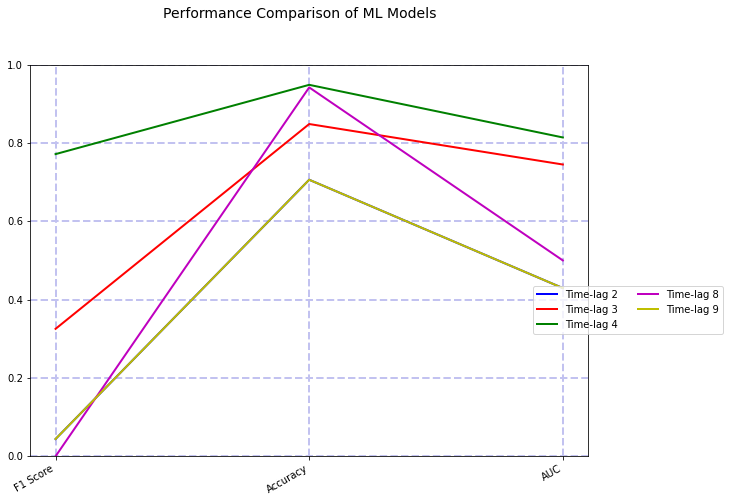

In [194]:
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon

# Define data for five models
models = ["Time-lag 2", "Time-lag 3", "Time-lag 4", "Time-lag 8", "Time-lag 9" ]
# precision = [0.92, 0.63, 0.08, 0.15, 0.12,0.59, 0.05]
accuracy = [0.7059620596205962, 0.8482384823848238, 0.948319783197832, 0.9417344173441734, 0.7059620596205962]
f1_score = [0.04405286343612335, 0.3253012048192771, 0.7714285714285715, 0.0, 0.04405286343612335]
roc_auc = [0.4293625564664547,0.7448887401706542, 0.813953488372093, 0.5, 0.4293625564664547]

# Define number of variables (metrics)
num_vars = 3

# Generate colors for each model
colors = ['b', 'r', 'g', 'm', 'y']

# Create a figure and axes
fig, axes = plt.subplots(1, figsize=(10, 8))

# Set radar chart parameters
labels = ['F1 Score', 'Accuracy', 'AUC']
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
angles += np.pi / 2  # shift labels to right side

# Create radar chart for each model
for i in range(len(models)):
    ax = axes
    # set center as origin
    center = [0, 0] 

    # create data points for each metric
    data = [f1_score[i], accuracy[i], roc_auc[i]]

    # create polygon patch for model
    polygon = RegularPolygon(xy=center, numVertices=num_vars, radius=0.8, color=colors[i])
    ax.add_artist(polygon)

    # plot data points and connect them with line
    ax.plot(angles, data, linewidth=2, color=colors[i], label=models[i])

    # add labels
    ax.set_xticks(angles)
    ax.set_xticklabels(labels, rotation=30, ha='right')

    # set grid
    ax.grid([0.2, 0.4, 0.6, 0.8], color='#c2c2f0', linestyle='--', linewidth=2)
    ax.set_ylim(0, 1)

# add legend
ax.legend(loc='lower right', bbox_to_anchor=(1.25, 0.3), ncol=2)

# adjust layout
plt.subplots_adjust(bottom=0.2)

# set title and show plot
plt.suptitle('Performance Comparison of ML Models', fontsize=14)
plt.show()

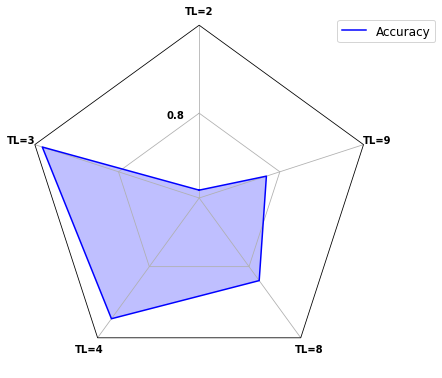

In [427]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels, fontsize=10, weight='bold')

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


def example_data():
    # The following data is from the Denver Aerosol Sources and Health study.
    # See doi:10.1016/j.atmosenv.2008.12.017
    #
    # The data are pollution source profile estimates for five modeled
    # pollution sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical
    # species. The radar charts are experimented with here to see if we can
    # nicely visualize how the modeled source profiles change across four
    # scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolyzed Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase species is present...
    data = [
        ['TL=2', 'TL=3', 'TL=4', 'TL=8', 'TL=9'],
        ('Time-lag (TL) Parameter performance comparison', [acc_tl])
    ]
    return data


if __name__ == '__main__':
    N = 5
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, axs = plt.subplots(figsize=(8, 6), nrows=1, ncols=1,
                            subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['b', 'r', 'g', 'm', 'y']
    # Plot the four cases from the example data on separate axes
    ax = axs
    title = data[0][0]
    case_data = data[0][1]
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8], weight='bold')
    # ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
    #                 horizontalalignment='center', verticalalignment='center')
    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.25, label='_nolegend_')
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ('Accuracy', 'F1 Score', 'ROC-AUC')
    legend = axs.legend(labels, loc=(0.9, .95),
                              labelspacing=0.1, fontsize='large')
    # # Add grid lines
    # ax.set_xticks(theta)
    # ax.set_yticklabels([])  # You can adjust this line if you want to show radial axis labels

    # # Customize grid lines
    # ax.grid(True)
    
    # plt.grid(axis='both', linestyle='--', alpha=0.7)
    # plt.tight_layout()
# plt.savefig('perf_tl.jpg', format='jpeg', dpi=300)

    # fig.text(0.5, 0.965, 'Time-lag (TL) Parameter performance comparison',
    #          horizontalalignment='center', color='black', weight='bold',
    #          size='large')
    plt.savefig('radar_acc_WADI.jpg', type="jpeg", dpi=300)
    plt.show()

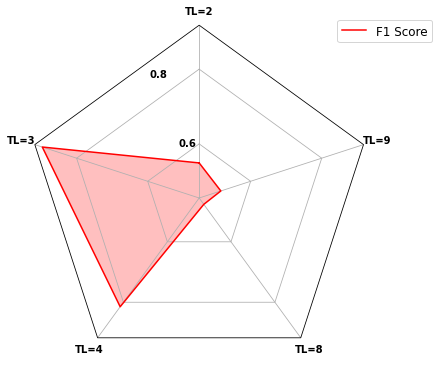

In [426]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels, fontsize=10, weight='bold')

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


def example_data():
    # The following data is from the Denver Aerosol Sources and Health study.
    # See doi:10.1016/j.atmosenv.2008.12.017
    #
    # The data are pollution source profile estimates for five modeled
    # pollution sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical
    # species. The radar charts are experimented with here to see if we can
    # nicely visualize how the modeled source profiles change across four
    # scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolyzed Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase species is present...
    data = [
        ['TL=2', 'TL=3', 'TL=4', 'TL=8', 'TL=9'],
        ('Time-lag (TL) Parameter performance comparison', [f1_tl])
    ]
    return data


if __name__ == '__main__':
    N = 5
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, axs = plt.subplots(figsize=(8, 6), nrows=1, ncols=1,
                            subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['r', 'g', 'm', 'y']
    # Plot the four cases from the example data on separate axes
    ax = axs
    title = data[0][0]
    case_data = data[0][1]
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8], weight='bold')
    # ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
    #                 horizontalalignment='center', verticalalignment='center')
    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.25, label='_nolegend_')
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ('F1 Score', 'Accuracy', 'ROC-AUC')
    legend = axs.legend(labels, loc=(0.9, .95),
                              labelspacing=0.1, fontsize='large')

    # fig.text(0.5, 0.965, 'Time-lag (TL) Parameter performance comparison',
    #          horizontalalignment='center', color='black', weight='bold',
    #          size='large')
    plt.savefig('radar_f1_WADI.jpg', type="jpeg", dpi=300)
    plt.show()

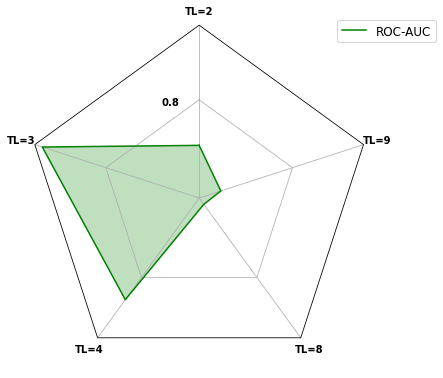

In [425]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels, fontsize=10, weight='bold')

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


def example_data():
    # The following data is from the Denver Aerosol Sources and Health study.
    # See doi:10.1016/j.atmosenv.2008.12.017
    #
    # The data are pollution source profile estimates for five modeled
    # pollution sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical
    # species. The radar charts are experimented with here to see if we can
    # nicely visualize how the modeled source profiles change across four
    # scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolyzed Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase species is present...
    data = [
        ['TL=2', 'TL=3', 'TL=4', 'TL=8', 'TL=9'],
        ('Time-lag (TL) Parameter performance comparison', [roc_tl])
    ]
    return data


if __name__ == '__main__':
    N = 5
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, axs = plt.subplots(figsize=(8, 6), nrows=1, ncols=1,
                            subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['g', 'm', 'y']
    # Plot the four cases from the example data on separate axes
    ax = axs
    title = data[0][0]
    case_data = data[0][1]
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8], weight='bold')
    # ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
    #                 horizontalalignment='center', verticalalignment='center')
    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.25, label='_nolegend_')
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ('ROC-AUC', 'Accuracy', 'F1 Score')
    legend = axs.legend(labels, loc=(0.9, .95),
                              labelspacing=0.1, fontsize='large')

    # fig.text(0.5, 0.965, 'Time-lag (TL) Parameter performance comparison',
    #          horizontalalignment='center', color='black', weight='bold',
    #          size='large')
    plt.savefig('radar_roc_WADI.jpg', type="jpeg", dpi=300)
    plt.show()

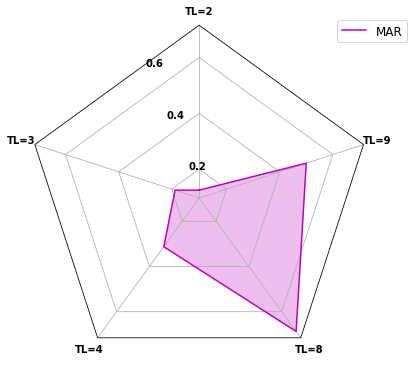

In [424]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels, fontsize=10, weight='bold')

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


def example_data():
    # The following data is from the Denver Aerosol Sources and Health study.
    # See doi:10.1016/j.atmosenv.2008.12.017
    #
    # The data are pollution source profile estimates for five modeled
    # pollution sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical
    # species. The radar charts are experimented with here to see if we can
    # nicely visualize how the modeled source profiles change across four
    # scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolyzed Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase species is present...
    data = [
        ['TL=2', 'TL=3', 'TL=4', 'TL=8', 'TL=9'],
        ('Time-lag (TL) Parameter performance comparison', [mar_tl])
    ]
    return data


if __name__ == '__main__':
    N = 5
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, axs = plt.subplots(figsize=(8, 6), nrows=1, ncols=1,
                            subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['m', 'y']
    # Plot the four cases from the example data on separate axes
    ax = axs
    title = data[0][0]
    case_data = data[0][1]
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8], weight='bold')
    # ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
    #                 horizontalalignment='center', verticalalignment='center')
    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.25, label='_nolegend_')
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ('MAR','ROC-AUC', 'Accuracy', 'F1 Score')
    legend = axs.legend(labels, loc=(0.9, .95),
                              labelspacing=0.1, fontsize='large')

    # fig.text(0.5, 0.965, 'Time-lag (TL) Parameter performance comparison',
    #          horizontalalignment='center', color='black', weight='bold',
    #          size='large')
    plt.savefig('radar_mar_WADI.jpg', type="jpeg", dpi=300)
    plt.show()

In [212]:
data[0][1]

[[0.7059620596205962,
  0.8482384823848238,
  0.948319783197832,
  0.9417344173441734,
  0.7059620596205962],
 [0.04405286343612335,
  0.3253012048192771,
  0.7714285714285715,
  0.0,
  0.04405286343612335],
 [0.4293625564664547,
  0.7448887401706542,
  0.813953488372093,
  0.5,
  0.4293625564664547]]

In [89]:
import time

In [343]:
#CGOD
start = time.time()
struct_model_attack = from_pandas_dynamic(df_attack_train, 4)
struct_mode_normal = from_pandas_dynamic(df_normal_train, 4)
cgod_train_time = time.time() - start

cgod_train_time

4.262829065322876

In [345]:
start = time.time()
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, roc_auc_score
y_pred = []
for i in range(0, len(df_test),900):
    df_struct_test = df_test[i:i+900]
    df_struct_test['DateTime'] = df_struct_test['DateTime'].apply(lambda x: x.value)
    struct_model_test = from_pandas_dynamic(df_struct_test, 4)

    shd_TA = structural_hamming_distance(struct_model_attack, struct_model_test)
    shd_TN = structural_hamming_distance(struct_mode_normal, struct_model_test)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)

roc4 = roc_auc_score(y_true_segs, y_pred)
acc4 = accuracy_score(y_true_segs, y_pred)
f14 = f1_score(y_true_segs, y_pred)

cgod_test_time = time.time() - start

print(f" ROC_tl4 : {roc4}")
print(f"Accuracy_tl4 : {acc4}")
print(f"F1_Score_tl4 : {f14}")

cgod_test_time

 ROC_tl4 : 0.8055555555555556
Accuracy_tl4 : 0.8939393939393939
F1_Score_tl4 : 0.7586206896551725


99.77220487594604

In [334]:
#Baseline_Models
df_attack_train_baseline = pd.read_csv('../WADI_dataset/WADI_attack_train-baseline.csv',index_col=0).reset_index(drop=True)
df_normal_train_baseline = pd.read_csv('../WADI_dataset/WADI_normal_train-baseline.csv',index_col=0).reset_index(drop=True)
df_test_baseline = pd.read_csv('../WADI_dataset/WADI_test-V2.csv',index_col=0).reset_index(drop=True)


In [335]:
df_baseline_train = pd.concat([df_normal_train_baseline, df_attack_train_baseline]).reset_index(drop=True)
df_baseline_test = df_test_baseline.reset_index(drop=True)
df_baseline_train.drop(columns='DateTime', inplace=True)
df_baseline_test.drop(columns='DateTime', inplace=True)
df_baseline_train = df_baseline_train.sample(frac=1)
y_train = df_baseline_train['IsAttack'].reset_index(drop=True)
df_baseline_train.drop(columns=['IsAttack'], inplace=True)
X_train = df_baseline_train.reset_index(drop=True)
# df_baseline_test = df_baseline_test.sample(frac=1)
y_test = df_baseline_test['IsAttack'].reset_index(drop=True)
df_baseline_test.drop(columns=['IsAttack'], inplace=True)
X_test = df_baseline_test

In [216]:
y_test.loc[y_test==1]

5050     1
5051     1
5052     1
5053     1
5054     1
        ..
58922    1
58923    1
58924    1
58925    1
58926    1
Name: IsAttack, Length: 6977, dtype: int64

In [336]:
#Deep SVDD
start_train = time.time()
from pyod.models.deep_svdd import DeepSVDD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = DeepSVDD()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

svdd_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

# y_true_baseline = []
# for i in range(0, len(y_test),200):
#     if (sum(y_test[i:i+200])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test),200):
#     if (sum(y_test_preds[i:i+200])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)

# precision = precision_score(y_true_baseline, y_pred_baseline)
# recall = recall_score(y_true_baseline, y_pred_baseline)
# f1Score = f1_score(y_true_baseline, y_pred_baseline)
# roc = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc = accuracy_score(y_true_baseline, y_pred_baseline)

precision = precision_score(y_test, y_test_preds)
recall = recall_score(y_test, y_test_preds)
f1Score = f1_score(y_test, y_test_preds)
roc = roc_auc_score(y_test, y_test_preds)
acc = accuracy_score(y_test, y_test_preds)
mae = mean_absolute_error(y_test, y_test_preds)

svdd_test_time = time.time() - start_test

print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f" ROC : {roc}")
print(f"Accuracy : {acc}")
print(f"F1_Score : {f1Score}")
print(f"MAE : {mae}")

print (f"SVDD train time : {svdd_train_time}")
print (f"SVDD test time :  {svdd_test_time}")

1530/1530 [==============================] - 2s 1ms/step
Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 123)]             0         
                                                                 
 dense_9 (Dense)             (None, 64)                7872      
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_9 (TFOpLa  (None, 32)                0         
 mbda)                                                           
                                                                 
 tf.math.pow_9 (TFOpLambda)  (None, 32)                0         
                                                                 
 tf.math.reduce_sum_9 (TFOp  (None,)                   0         
 

In [301]:
start_train = time.time()
from pyod.models.ecod import ECOD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = ECOD()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

ecod_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

y_true_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)

precision = precision_score(y_test, y_test_preds)
recall = recall_score(y_test, y_test_preds)
f1Score = f1_score(y_test, y_test_preds)
roc = roc_auc_score(y_test, y_test_preds)
acc = accuracy_score(y_test, y_test_preds)

ecod_test_time = time.time() - start_test

mae = mean_absolute_error(y_test, y_test_preds)
print(f"MAE : {mae}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f" ROC : {roc}")
print(f"Accuracy : {acc}")
print(f"F1_Score : {f1Score}")

print (f"ECOD train time : {ecod_train_time}")
print (f"ECOD test time :  {ecod_test_time}")

MAE : 0.17506406231438898
Precision : 0.3433129985922102
Recall : 0.5242941092159954
 ROC : 0.6948034549929832
Accuracy : 0.824935937685611
F1_Score : 0.41492740471869327
ECOD train time : 0.06855344772338867
ECOD test time :  3.3099193572998047


In [236]:
sum(y_true_baseline)

58

In [337]:
start_train = time.time()
from pyod.models.copod import COPOD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = COPOD()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

copod_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

# y_true_baseline = []
# for i in range(0, len(y_test),900):
#     if (sum(y_test[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)

# precision = precision_score(y_true_baseline, y_pred_baseline)
# recall = recall_score(y_true_baseline, y_pred_baseline)
# f1Score = f1_score(y_true_baseline, y_pred_baseline)
# roc = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc = accuracy_score(y_true_baseline, y_pred_baseline)

precision = precision_score(y_test, y_test_preds)
recall = recall_score(y_test, y_test_preds)
f1Score = f1_score(y_test, y_test_preds)
roc = roc_auc_score(y_test, y_test_preds)
acc = accuracy_score(y_test, y_test_preds)

copod_test_time = time.time() - start_test

mae = mean_absolute_error(y_test, y_test_preds)
print(f"MAE : {mae}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f" ROC : {roc}")
print(f"Accuracy : {acc}")
print(f"F1_Score : {f1Score}")

print (f"COPOD train time : {copod_train_time}")
print (f"COPOD test time :  {copod_test_time}")

MAE : 0.2459992872537207
Precision : 0.267199207381262
Recall : 0.6184606564425971
 ROC : 0.6953323493955046
Accuracy : 0.7540007127462793
F1_Score : 0.3731730519761308
COPOD train time : 1.248941421508789
COPOD test time :  5.813978433609009


In [338]:
precision_score(y_test, y_test_preds)

0.267199207381262

In [339]:
start_train = time.time()
from pyod.models.loda import LODA
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = LODA()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

loda_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

# y_true_baseline = []
# for i in range(0, len(y_test),900):
#     if (sum(y_test[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)

# precision = precision_score(y_true_baseline, y_pred_baseline)
# recall = recall_score(y_true_baseline, y_pred_baseline)
# f1Score = f1_score(y_true_baseline, y_pred_baseline)
# roc = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc = accuracy_score(y_true_baseline, y_pred_baseline)

precision = precision_score(y_test, y_test_preds)
recall = recall_score(y_test, y_test_preds)
f1Score = f1_score(y_test, y_test_preds)
roc = roc_auc_score(y_test, y_test_preds)
acc = accuracy_score(y_test, y_test_preds)

loda_test_time = time.time() - start_test
mae = mean_absolute_error(y_test, y_test_preds)
print(f"MAE : {mae}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f" ROC : {roc}")
print(f"Accuracy : {acc}")
print(f"F1_Score : {f1Score}")


print (f"LODA train time : {loda_train_time}")
print (f"LODA test time :  {loda_test_time}")

MAE : 0.3734620802009266
Precision : 0.14628635978537136
Recall : 0.4454636663322345
 ROC : 0.5481601296050008
Accuracy : 0.6265379197990735
F1_Score : 0.22024589873507422
LODA train time : 0.3821141719818115
LODA test time :  0.697643518447876


In [340]:
start_train = time.time()
from pyod.models.inne import INNE
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = INNE()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

inne_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

# y_true_baseline = []
# for i in range(0, len(y_test),900):
#     if (sum(y_test[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)

# precision = precision_score(y_true_baseline, y_pred_baseline)
# recall = recall_score(y_true_baseline, y_pred_baseline)
# f1Score = f1_score(y_true_baseline, y_pred_baseline)
# roc = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc = accuracy_score(y_true_baseline, y_pred_baseline)

precision = precision_score(y_test, y_test_preds)
recall = recall_score(y_test, y_test_preds)
f1Score = f1_score(y_test, y_test_preds)
roc = roc_auc_score(y_test, y_test_preds)
acc = accuracy_score(y_test, y_test_preds)

inne_test_time = time.time() - start_test

mae = mean_absolute_error(y_test, y_test_preds)
print(f"MAE : {mae}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f" ROC : {roc}")
print(f"Accuracy : {acc}")
print(f"F1_Score : {f1Score}")


print (f"INNE train time : {inne_train_time}")
print (f"INNE test time :  {inne_test_time}")

MAE : 0.591494561067083
Precision : 0.12551716726667025
Recall : 0.6696287802780565
 ROC : 0.5215323882141004
Accuracy : 0.408505438932917
F1_Score : 0.2114074979071925
INNE train time : 4.49431848526001
INNE test time :  9.887044668197632


In [341]:
start_train = time.time()
from pyod.models.abod import ABOD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = ABOD()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

abod_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

# y_true_baseline = []
# for i in range(0, len(y_test),900):
#     if (sum(y_test[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)

# precision = precision_score(y_true_baseline, y_pred_baseline)
# recall = recall_score(y_true_baseline, y_pred_baseline)
# f1Score = f1_score(y_true_baseline, y_pred_baseline)
# roc = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc = accuracy_score(y_true_baseline, y_pred_baseline)

precision = precision_score(y_test, y_test_preds)
recall = recall_score(y_test, y_test_preds)
f1Score = f1_score(y_test, y_test_preds)
roc = roc_auc_score(y_test, y_test_preds)
acc = accuracy_score(y_test, y_test_preds)

abod_test_time = time.time() - start_test

mae = mean_absolute_error(y_test, y_test_preds)
print(f"MAE : {mae}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f" ROC : {roc}")
print(f"Accuracy : {acc}")
print(f"F1_Score : {f1Score}")

print (f"ABOD train time : {abod_train_time}")
print (f"ABOD test time :  {abod_test_time}")

MAE : 0.1184007331104587
Precision : 0.0
Recall : 0.0
 ROC : 0.5
Accuracy : 0.8815992668895413
F1_Score : 0.0
ABOD train time : 41.5209436416626
ABOD test time :  34.46038293838501


In [342]:
start_train = time.time()
from pyod.models.sampling import Sampling
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = Sampling()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

sampling_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

# y_true_baseline = []
# for i in range(0, len(y_test),900):
#     if (sum(y_test[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)

# precision = precision_score(y_true_baseline, y_pred_baseline)
# recall = recall_score(y_true_baseline, y_pred_baseline)
# f1Score = f1_score(y_true_baseline, y_pred_baseline)
# roc = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc = accuracy_score(y_true_baseline, y_pred_baseline)

precision = precision_score(y_test, y_test_preds)
recall = recall_score(y_test, y_test_preds)
f1Score = f1_score(y_test, y_test_preds)
roc = roc_auc_score(y_test, y_test_preds)
acc = accuracy_score(y_test, y_test_preds)

sampling_test_time = time.time() - start_test

mae = mean_absolute_error(y_test, y_test_preds)
print(f"MAE : {mae}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f" ROC : {roc}")
print(f"Accuracy : {acc}")
print(f"F1_Score : {f1Score}")


print (f"Sampling train time : {sampling_train_time}")
print (f"Sampling test time :  {sampling_test_time}")

MAE : 0.5928012625791234
Precision : 0.12172877594652377
Recall : 0.644689694711194
 ROC : 0.5099964354210446
Accuracy : 0.4071987374208767
F1_Score : 0.20478965580040065
Sampling train time : 0.10875320434570312
Sampling test time :  0.26725268363952637


In [ ]:
CNN-LSTM_prec =  0.8619
CNN-LSTM_recall = 0.7041
CNN-LSTM_f1 = 0.775


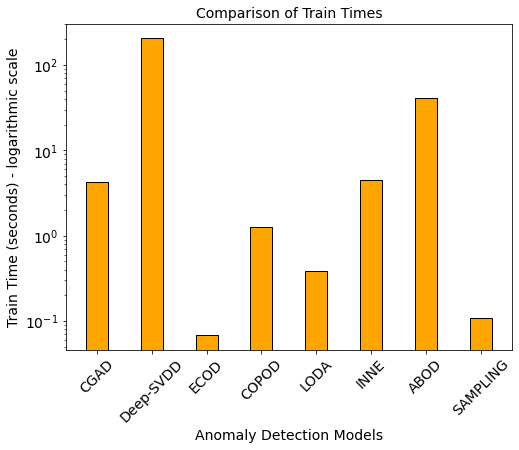

In [346]:
import matplotlib.pyplot as plt
models = ["CGAD", "Deep-SVDD", "ECOD", "COPOD", "LODA", "INNE", "ABOD", "SAMPLING"]
train_times = [4.26, 204.22019505500793 , 0.06855344772338867 , 1.248941421508789 ,
                0.3821141719818115, 4.49431848526001, 41.5209436416626 , 0.10875320434570312 ]


plt.figure(figsize=(8, 6))
plt.bar(models, train_times, color='orange', edgecolor='black', width=0.4)
plt.yscale("log")
plt.xlabel("Anomaly Detection Models", fontsize=14)
plt.ylabel("Train Time (seconds) - logarithmic scale", fontsize=14)
plt.title("Comparison of Train Times", fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('train_cmp_WADI.jpg', format="jpeg", dpi=300, bbox_inches = 'tight')
plt.show()

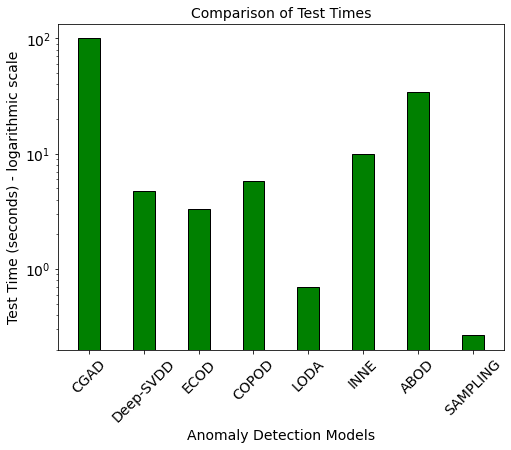

In [347]:
import matplotlib.pyplot as plt
models = ["CGAD", "Deep-SVDD", "ECOD", "COPOD", "LODA", "INNE", "ABOD", "SAMPLING"]
test_times = [99.77220487594604, 4.783389329910278, 3.30991935729980473, 5.813978433609009,
                0.697643518447876, 9.887044668197632, 34.46038293838501, 0.26725268363952637]


plt.figure(figsize=(8, 6))
plt.bar(models, test_times, color = "green", edgecolor='black', width=0.4)
plt.yscale("log")
plt.xlabel("Anomaly Detection Models", fontsize=14)
plt.ylabel("Test Time (seconds) - logarithmic scale", fontsize=14)
plt.title("Comparison of Test Times", fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('test_cmp_WADI.jpg', format="jpeg", dpi=300, bbox_inches = 'tight')
plt.show()

In [323]:
#Box Plot

df_attack_train = pd.read_csv('../WADI_dataset/WADI_attack_train-V2.csv',index_col=0).reset_index(drop=True)
df_normal_train = pd.read_csv('../WADI_dataset/WADI_normal_train-V2.csv',index_col=0).reset_index(drop=True)
df_test = pd.read_csv('../WADI_dataset/WADI_test-V2.csv',index_col=0).reset_index(drop=True)

In [324]:
df_attack_train['DateTime'] = pd.to_datetime(df_attack_train['DateTime'])
df_normal_train['DateTime'] = pd.to_datetime(df_normal_train['DateTime'])
df_test['DateTime'] = pd.to_datetime(df_test['DateTime'])
df_attack_train['DateTime'] = df_attack_train['DateTime'].apply(lambda x:x.value)
# df_attack_train.drop(columns='IsAttack', inplace=True)


In [325]:
struct_model_attack = from_pandas_dynamic(df_attack_train, 4)
df_normal_train['DateTime'] = df_normal_train['DateTime'].apply(lambda x:x.value)
# df_normal_train.drop(columns='IsAttack', inplace=True)

struct_model_normal = from_pandas_dynamic(df_normal_train, 4)

y_true = df_test['IsAttack']
df_test.drop(columns=['IsAttack'], inplace=True)

y_true_segs = []
for i in range(0, len(y_true), 900):
    # print(sum(y_true[i:i+900]))
    if (sum(y_true[i:i+900])>0):
        y_true_segs.append(1)
    else:
        y_true_segs.append(0)


In [326]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, roc_auc_score
y_pred = []

for i in range(0, len(df_test),900):
    df_struct_test = df_test[i:i+900]
    df_struct_test['DateTime'] = df_struct_test['DateTime'].apply(lambda x: x.value)
    struct_model_test = from_pandas_dynamic(df_struct_test, 4)

    shd_TA = structural_hamming_distance(struct_model_attack, struct_model_test)
    shd_TN = structural_hamming_distance(struct_model_normal, struct_model_test)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [327]:
roc_cgod = []
acc_cgod = []
f1_cgod = []
mar_cgod = []

roc = roc_auc_score(y_true_segs, y_pred)
roc_cgod.append(roc)
acc = accuracy_score(y_true_segs, y_pred)
acc_cgod.append(acc)
f1 = f1_score(y_true_segs, y_pred)
f1_cgod.append(f1)
mar = 1 - recall_score(y_true_segs, y_pred)
mar_cgod.append(mar)


In [317]:
print (roc_cgod)
print (acc_cgod)
print (f1_cgod)

[0.875]
[0.9393939393939394]
[0.8571428571428571]


In [328]:
df_test = pd.read_csv('../WADI_dataset/WADI_test-V2.csv',index_col=0).reset_index(drop=True)
df_test['DateTime'] = pd.to_datetime(df_test['DateTime'])



In [329]:
df_test_1 = df_test

group_size = 1200

# Calculate the number of groups
num_groups = len(df_test_1) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(df_test_1))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df = df_test_1.iloc[shuffled_indices].reset_index(drop=True)
df_test_1 = shuffled_df


y_true = df_test_1['IsAttack']
df_test_1.drop(columns=['IsAttack'], inplace=True)

y_true_segs = []
for i in range(0, len(y_true), 900):
    # print(sum(y_true[i:i+900]))
    if (sum(y_true[i:i+900])>0):
        y_true_segs.append(1)
    else:
        y_true_segs.append(0)


y_pred = []

for i in range(0, len(df_test_1),900):
    df_struct_test = df_test_1[i:i+900]
    df_struct_test['DateTime'] = df_struct_test['DateTime'].apply(lambda x: x.value)
    struct_model_test = from_pandas_dynamic(df_struct_test, 4)

    shd_TA = structural_hamming_distance(struct_model_attack, struct_model_test)
    shd_TN = structural_hamming_distance(struct_model_normal, struct_model_test)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)


roc_1 = roc_auc_score(y_true_segs, y_pred)
roc_cgod.append(roc_1)
acc_1 = accuracy_score(y_true_segs, y_pred)
acc_cgod.append(acc_1)
f1_1 = f1_score(y_true_segs, y_pred)
f1_cgod.append(f1_1)
mar_1 = 1 - recall_score(y_true_segs, y_pred)
mar_cgod.append(mar_1) 


In [330]:
df_test_2 = df_test

group_size = 1400

# Calculate the number of groups
num_groups = len(df_test_2) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(df_test_2))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df = df_test_2.iloc[shuffled_indices].reset_index(drop=True)
df_test_2 = shuffled_df


y_true = df_test_2['IsAttack']
df_test_2.drop(columns=['IsAttack'], inplace=True)

y_true_segs = []
for i in range(0, len(y_true), 900):
    # print(sum(y_true[i:i+900]))
    if (sum(y_true[i:i+900])>0):
        y_true_segs.append(1)
    else:
        y_true_segs.append(0)


y_pred = []

for i in range(0, len(df_test_2),900):
    df_struct_test = df_test_2[i:i+900]
    df_struct_test['DateTime'] = df_struct_test['DateTime'].apply(lambda x: x.value)
    struct_model_test = from_pandas_dynamic(df_struct_test, 4)

    shd_TA = structural_hamming_distance(struct_model_attack, struct_model_test)
    shd_TN = structural_hamming_distance(struct_model_normal, struct_model_test)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)


roc_2 = roc_auc_score(y_true_segs, y_pred)
roc_cgod.append(roc_2)
acc_2 = accuracy_score(y_true_segs, y_pred)
acc_cgod.append(acc_2)
f1_2 = f1_score(y_true_segs, y_pred)
f1_cgod.append(f1_2)
mar_2 = 1 - recall_score(y_true_segs, y_pred)
mar_cgod.append(mar_2)

In [331]:
df_test_3 = df_test

group_size = 1600

# Calculate the number of groups
num_groups = len(df_test_3) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(df_test_3))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df = df_test_3.iloc[shuffled_indices].reset_index(drop=True)
df_test_3 = shuffled_df


y_true = df_test_3['IsAttack']
df_test_3.drop(columns=['IsAttack'], inplace=True)

y_true_segs = []
for i in range(0, len(y_true), 900):
    # print(sum(y_true[i:i+900]))
    if (sum(y_true[i:i+900])>0):
        y_true_segs.append(1)
    else:
        y_true_segs.append(0)


y_pred = []

for i in range(0, len(df_test_3),900):
    df_struct_test = df_test_3[i:i+900]
    df_struct_test['DateTime'] = df_struct_test['DateTime'].apply(lambda x: x.value)
    struct_model_test = from_pandas_dynamic(df_struct_test, 4)

    shd_TA = structural_hamming_distance(struct_model_attack, struct_model_test)
    shd_TN = structural_hamming_distance(struct_model_normal, struct_model_test)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)


roc_3 = roc_auc_score(y_true_segs, y_pred)
roc_cgod.append(roc_3)
acc_3 = accuracy_score(y_true_segs, y_pred)
acc_cgod.append(acc_3)
f1_3 = f1_score(y_true_segs, y_pred)
f1_cgod.append(f1_3)
mar_3 = 1 - recall_score(y_true_segs, y_pred)
mar_cgod.append(mar_3)

In [332]:
df_test_4 = df_test

group_size = 800

# Calculate the number of groups
num_groups = len(df_test_4) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(df_test_4))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df = df_test_4.iloc[shuffled_indices].reset_index(drop=True)
df_test_4 = shuffled_df


y_true = df_test_4['IsAttack']
df_test_4.drop(columns=['IsAttack'], inplace=True)

y_true_segs = []
for i in range(0, len(y_true), 900):
    # print(sum(y_true[i:i+900]))
    if (sum(y_true[i:i+900])>0):
        y_true_segs.append(1)
    else:
        y_true_segs.append(0)


y_pred = []

for i in range(0, len(df_test_4),900):
    df_struct_test = df_test_4[i:i+900]
    df_struct_test['DateTime'] = df_struct_test['DateTime'].apply(lambda x: x.value)
    struct_model_test = from_pandas_dynamic(df_struct_test, 4)

    shd_TA = structural_hamming_distance(struct_model_attack, struct_model_test)
    shd_TN = structural_hamming_distance(struct_model_normal, struct_model_test)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)


roc_4 = roc_auc_score(y_true_segs, y_pred)
roc_cgod.append(roc_4)
acc_4 = accuracy_score(y_true_segs, y_pred)
acc_cgod.append(acc_4)
f1_4 = f1_score(y_true_segs, y_pred)
f1_cgod.append(f1_4)
mar_4 = 1 - recall_score(y_true_segs, y_pred)
mar_cgod.append(mar_4)

In [333]:
df_test_5 = df_test

group_size = 600

# Calculate the number of groups
num_groups = len(df_test_5) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(df_test_5))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df = df_test_5.iloc[shuffled_indices].reset_index(drop=True)
df_test_5 = shuffled_df


y_true = df_test_5['IsAttack']
df_test_5.drop(columns=['IsAttack'], inplace=True)

y_true_segs = []
for i in range(0, len(y_true), 900):
    # print(sum(y_true[i:i+900]))
    if (sum(y_true[i:i+900])>0):
        y_true_segs.append(1)
    else:
        y_true_segs.append(0)


y_pred = []

for i in range(0, len(df_test_5),900):
    df_struct_test = df_test_5[i:i+900]
    df_struct_test['DateTime'] = df_struct_test['DateTime'].apply(lambda x: x.value)
    struct_model_test = from_pandas_dynamic(df_struct_test, 4)

    shd_TA = structural_hamming_distance(struct_model_attack, struct_model_test)
    shd_TN = structural_hamming_distance(struct_model_normal, struct_model_test)

    if shd_TA<shd_TN:
        y_pred.append(1)
    else:
        y_pred.append(0)


roc_5 = roc_auc_score(y_true_segs, y_pred)
roc_cgod.append(roc_5)
acc_5 = accuracy_score(y_true_segs, y_pred)
acc_cgod.append(acc_5)
f1_5 = f1_score(y_true_segs, y_pred)
f1_cgod.append(f1_5)
mar_5 = 1 - recall_score(y_true_segs, y_pred)
mar_cgod.append(mar_5)

In [63]:
roc_cgod = [0.813953488372093, 0.775, 0.7230769230769231, 0.7133333333333334, 0.7583333333333333, 0.79]
acc_cgod = [0.938319783197832, 0.9434146341463414, 0.9212195121951219, 0.9217344173441734, 0.9407046070460704, 0.9115447154471545]
f1_cgod = [0.7714285714285715, 0.7096774193548387, 0.6170212765957447, 0.5981308411214953, 0.6813186813186815, 0.7341772151898733]

In [348]:
#Baseline_Models
df_attack_train_baseline = pd.read_csv('../WADI_dataset/WADI_attack_train-baseline.csv',index_col=0).reset_index(drop=True)
df_normal_train_baseline = pd.read_csv('../WADI_dataset/WADI_normal_train-baseline.csv',index_col=0).reset_index(drop=True)
df_test_baseline = pd.read_csv('../WADI_dataset/WADI_test-V2.csv',index_col=0).reset_index(drop=True)
df_baseline_train = pd.concat([df_normal_train_baseline, df_attack_train_baseline]).reset_index(drop=True)
df_baseline_test = df_test_baseline.reset_index(drop=True)
df_baseline_train.drop(columns='DateTime', inplace=True)
df_baseline_test.drop(columns='DateTime', inplace=True)
df_baseline_train = df_baseline_train.sample(frac=1)
y_train = df_baseline_train['IsAttack']
df_baseline_train.drop(columns=['IsAttack'], inplace=True)
X_train = df_baseline_train
y_test = df_baseline_test['IsAttack']
df_baseline_test.drop(columns=['IsAttack'], inplace=True)
X_test = df_baseline_test

In [355]:
from pyod.models.ecod import ECOD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = ECOD()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

ecod_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

# y_true_baseline = []
# for i in range(0, len(y_test),900):
#     if (sum(y_test[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)


roc_ecod = []
acc_ecod = []
f1_ecod = []
mar_ecod = []

f1Score = f1_score(y_test, y_test_preds)
roc = roc_auc_score(y_test, y_test_preds)
acc = accuracy_score(y_test, y_test_preds)
mar = 1 - recall_score(y_test, y_test_preds)

roc_ecod.append(roc)
f1_ecod.append(f1Score)
acc_ecod.append(acc)
mar_ecod.append(mar)

In [356]:
X_test_1 = X_test
y_test_1 = y_test

group_size = 1200

# Calculate the number of groups
num_groups = len(X_test_1) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_1))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_1.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_1.iloc[shuffled_indices].reset_index(drop=True)

X_test_1 = shuffled_df_X
y_test_1 = shuffled_df_y

model = ECOD()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

ecod_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test_1)

y_test_Scores = model.decision_function(X_test_1)

# y_true_baseline = []
# for i in range(0, len(y_test_1),900):
#     if (sum(y_test_1[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_1),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)


# f1Score_1 = f1_score(y_true_baseline, y_pred_baseline)
# roc_1 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_1 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_ecod.append(roc_1)
# f1_ecod.append(f1Score_1)
# acc_ecod.append(acc_1)

f1Score1 = f1_score(y_test_1, y_test_preds)
roc1 = roc_auc_score(y_test_1, y_test_preds)
acc1 = accuracy_score(y_test_1, y_test_preds)
mar1 = 1 - recall_score(y_test_1, y_test_preds)

roc_ecod.append(roc1)
f1_ecod.append(f1Score1)
acc_ecod.append(acc1)
mar_ecod.append(mar1)

In [357]:
X_test_2 = X_test
y_test_2 = y_test

group_size = 1400

# Calculate the number of groups
num_groups = len(X_test_2) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_2))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_2.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_2.iloc[shuffled_indices].reset_index(drop=True)

X_test_2 = shuffled_df_X
y_test_2 = shuffled_df_y

model = ECOD()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

ecod_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test_2)

y_test_Scores = model.decision_function(X_test_2)

# y_true_baseline = []
# for i in range(0, len(y_test_2),900):
#     if (sum(y_test_2[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_2),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)


# f1Score_2 = f1_score(y_true_baseline, y_pred_baseline)
# roc_2 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_2 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_ecod.append(roc_2)
# f1_ecod.append(f1Score_2)
# acc_ecod.append(acc_2)
f1Score2 = f1_score(y_test_2, y_test_preds)
roc2 = roc_auc_score(y_test_2, y_test_preds)
acc2 = accuracy_score(y_test_2, y_test_preds)
mar2 = 1 - recall_score(y_test_2, y_test_preds)

roc_ecod.append(roc2)
f1_ecod.append(f1Score2)
acc_ecod.append(acc2)
mar_ecod.append(mar2)

In [358]:
X_test_3 = X_test
y_test_3 = y_test

group_size = 1600

# Calculate the number of groups
num_groups = len(X_test_3) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_3))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_3.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_3.iloc[shuffled_indices].reset_index(drop=True)

X_test_3 = shuffled_df_X
y_test_3 = shuffled_df_y

model = ECOD()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

ecod_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test_3)

y_test_Scores = model.decision_function(X_test_3)

# y_true_baseline = []
# for i in range(0, len(y_test_3),900):
#     if (sum(y_test_3[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_3),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)



# f1Score_3 = f1_score(y_true_baseline, y_pred_baseline)
# roc_3 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_3 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_ecod.append(roc_3)
# f1_ecod.append(f1Score_3)
# acc_ecod.append(acc_3)

f1Score3 = f1_score(y_test_3, y_test_preds)
roc3 = roc_auc_score(y_test_3, y_test_preds)
acc3 = accuracy_score(y_test_3, y_test_preds)
mar3 = 1 - recall_score(y_test_3, y_test_preds)

roc_ecod.append(roc3)
f1_ecod.append(f1Score3)
acc_ecod.append(acc3)
mar_ecod.append(mar3)

In [359]:
X_test_4 = X_test
y_test_4 = y_test

group_size = 800

# Calculate the number of groups
num_groups = len(X_test_4) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_4))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_4.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_4.iloc[shuffled_indices].reset_index(drop=True)

X_test_4 = shuffled_df_X
y_test_4 = shuffled_df_y

model = ECOD()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

ecod_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test_4)

y_test_Scores = model.decision_function(X_test_4)

# y_true_baseline = []
# for i in range(0, len(y_test_4),900):
#     if (sum(y_test_4[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_4),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)



# f1Score_4 = f1_score(y_true_baseline, y_pred_baseline)
# roc_4 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_4 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_ecod.append(roc_4)
# f1_ecod.append(f1Score_4)
# acc_ecod.append(acc_4)

f1Score4 = f1_score(y_test_4, y_test_preds)
roc4 = roc_auc_score(y_test_4, y_test_preds)
acc4 = accuracy_score(y_test_4, y_test_preds)
mar4 = 1 - recall_score(y_test_4, y_test_preds)

roc_ecod.append(roc4)
f1_ecod.append(f1Score4)
acc_ecod.append(acc4)
mar_ecod.append(mar4)

In [275]:
roc_ecod = [0.7752601314348303, 0.7053571428571428, 0.704320987654321, 0.6889996308600959, 0.7075263336731227]
f1_ecod = [0.25490196078431376, 0.23556581986143188, 0.24561403508771928, 0.24628450106157113, 0.23058823529411765]
acc_ecod = [0.6779661016949152, 0.5324858757062146, 0.5141242937853108, 0.4985875706214689, 0.538135593220339]

In [360]:
from pyod.models.copod import COPOD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = COPOD()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

ecod_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

# y_true_baseline = []
# for i in range(0, len(y_test),900):
#     if (sum(y_test[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)


roc_copod = []
acc_copod = []
f1_copod = []
mar_copod = []

f1Score = f1_score(y_test, y_test_preds)
roc = roc_auc_score(y_test, y_test_preds)
acc = accuracy_score(y_test, y_test_preds)
mar = 1 - recall_score(y_test, y_test_preds)

roc_copod.append(roc)
f1_copod.append(f1Score)
acc_copod.append(acc)
mar_copod.append(mar)


X_test_1 = X_test
y_test_1 = y_test

group_size = 1200

# Calculate the number of groups
num_groups = len(X_test_1) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_1))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_1.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_1.iloc[shuffled_indices].reset_index(drop=True)

X_test_1 = shuffled_df_X
y_test_1 = shuffled_df_y


y_test_preds = model.predict(X_test_1)

y_test_Scores = model.decision_function(X_test_1)

# y_true_baseline = []
# for i in range(0, len(y_test_1),900):
#     if (sum(y_test_1[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_1),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)


# f1Score_1 = f1_score(y_true_baseline, y_pred_baseline)
# roc_1 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_1 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_copod.append(roc_1)
# f1_copod.append(f1Score_1)
# acc_copod.append(acc_1)

f1Score1 = f1_score(y_test_1, y_test_preds)
roc1 = roc_auc_score(y_test_1, y_test_preds)
acc1 = accuracy_score(y_test_1, y_test_preds)
mar1 = 1 - recall_score(y_test_1, y_test_preds)

roc_copod.append(roc1)
f1_copod.append(f1Score1)
acc_copod.append(acc1)
mar_copod.append(mar1)



X_test_2 = X_test
y_test_2 = y_test

group_size = 1400

# Calculate the number of groups
num_groups = len(X_test_2) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_2))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_2.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_2.iloc[shuffled_indices].reset_index(drop=True)

X_test_2 = shuffled_df_X
y_test_2 = shuffled_df_y

y_test_preds = model.predict(X_test_2)

y_test_Scores = model.decision_function(X_test_2)

# y_true_baseline = []
# for i in range(0, len(y_test_2),900):
#     if (sum(y_test_2[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_2),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)


# f1Score_2 = f1_score(y_true_baseline, y_pred_baseline)
# roc_2 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_2 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_copod.append(roc_2)
# f1_copod.append(f1Score_2)
# acc_copod.append(acc_2)

f1Score2 = f1_score(y_test_2, y_test_preds)
roc2 = roc_auc_score(y_test_2, y_test_preds)
acc2 = accuracy_score(y_test_2, y_test_preds)
mar2 = 1 - recall_score(y_test_2, y_test_preds)

roc_copod.append(roc2)
f1_copod.append(f1Score2)
acc_copod.append(acc2)
mar_copod.append(mar2)

X_test_3 = X_test
y_test_3 = y_test

group_size = 1600

# Calculate the number of groups
num_groups = len(X_test_3) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_3))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_3.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_3.iloc[shuffled_indices].reset_index(drop=True)

X_test_3 = shuffled_df_X
y_test_3 = shuffled_df_y

y_test_preds = model.predict(X_test_3)

y_test_Scores = model.decision_function(X_test_3)

# y_true_baseline = []
# for i in range(0, len(y_test_3),900):
#     if (sum(y_test_3[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_3),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)



# f1Score_3 = f1_score(y_true_baseline, y_pred_baseline)
# roc_3 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_3 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_copod.append(roc_3)
# f1_copod.append(f1Score_3)
# acc_copod.append(acc_3)

f1Score3 = f1_score(y_test_3, y_test_preds)
roc = roc_auc_score(y_test_3, y_test_preds)
acc = accuracy_score(y_test_3, y_test_preds)
mar = 1 - recall_score(y_test_3, y_test_preds)

roc_copod.append(roc)
f1_copod.append(f1Score)
acc_copod.append(acc)
mar_copod.append(mar)

X_test_4 = X_test
y_test_4 = y_test

group_size = 800

# Calculate the number of groups
num_groups = len(X_test_4) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_4))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_4.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_4.iloc[shuffled_indices].reset_index(drop=True)

X_test_4 = shuffled_df_X
y_test_4 = shuffled_df_y

y_test_preds = model.predict(X_test_4)

y_test_Scores = model.decision_function(X_test_4)

# y_true_baseline = []
# for i in range(0, len(y_test_4),900):
#     if (sum(y_test_4[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_4),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)



# f1Score_4 = f1_score(y_true_baseline, y_pred_baseline)
# roc_4 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_4 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_copod.append(roc_4)
# f1_copod.append(f1Score_4)
# acc_copod.append(acc_4)

f1Score4 = f1_score(y_test_4, y_test_preds)
roc4 = roc_auc_score(y_test_4, y_test_preds)
acc4 = accuracy_score(y_test_4, y_test_preds)
mar4 = 1 - recall_score(y_test_4, y_test_preds)

roc_copod.append(roc4)
f1_copod.append(f1Score4)
acc_copod.append(acc4)
mar_copod.append(mar4)

In [276]:
roc_copod = [0.7316538882803942, 0.628396143733567, 0.6206790123456791, 0.5909191583610188, 0.6287801563030921]
acc_copod = [0.576271186440678, 0.3757062146892655, 0.3333333333333333, 0.2937853107344633, 0.3926553672316384]
f1_copod = [0.21052631578947367, 0.19047619047619047, 0.19727891156462588, 0.1935483870967742, 0.1856060606060606]


In [361]:
from pyod.models.loda import LODA
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = LODA()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

ecod_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

# y_true_baseline = []
# for i in range(0, len(y_test),900):
#     if (sum(y_test[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)


roc_loda = []
acc_loda = []
f1_loda = []
mar_loda = []

f1Score = f1_score(y_test, y_test_preds)
roc = roc_auc_score(y_test, y_test_preds)
acc = accuracy_score(y_test, y_test_preds)
mar = 1 - recall_score(y_test, y_test_preds)

roc_loda.append(roc)
f1_loda.append(f1Score)
acc_loda.append(acc)
mar_loda.append(mar)

X_test_1 = X_test
y_test_1 = y_test

group_size = 1200

# Calculate the number of groups
num_groups = len(X_test_1) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_1))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_1.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_1.iloc[shuffled_indices].reset_index(drop=True)

X_test_1 = shuffled_df_X
y_test_1 = shuffled_df_y


y_test_preds = model.predict(X_test_1)

y_test_Scores = model.decision_function(X_test_1)

# y_true_baseline = []
# for i in range(0, len(y_test_1),900):
#     if (sum(y_test_1[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_1),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)


# f1Score_1 = f1_score(y_true_baseline, y_pred_baseline)
# roc_1 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_1 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_loda.append(roc_1)
# f1_loda.append(f1Score_1)
# acc_loda.append(acc_1)

f1Score1 = f1_score(y_test_1, y_test_preds)
roc1 = roc_auc_score(y_test_1, y_test_preds)
acc1 = accuracy_score(y_test_1, y_test_preds)
mar1 = 1 - recall_score(y_test_1, y_test_preds)

roc_loda.append(roc1)
f1_loda.append(f1Score1)
acc_loda.append(acc1)
mar_loda.append(mar1)

X_test_2 = X_test
y_test_2 = y_test

group_size = 1400

# Calculate the number of groups
num_groups = len(X_test_2) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_2))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_2.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_2.iloc[shuffled_indices].reset_index(drop=True)

X_test_2 = shuffled_df_X
y_test_2 = shuffled_df_y

y_test_preds = model.predict(X_test_2)

y_test_Scores = model.decision_function(X_test_2)

# y_true_baseline = []
# for i in range(0, len(y_test_2),900):
#     if (sum(y_test_2[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_2),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)


# f1Score_2 = f1_score(y_true_baseline, y_pred_baseline)
# roc_2 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_2 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_loda.append(roc_2)
# f1_loda.append(f1Score_2)
# acc_loda.append(acc_2)

f1Score2 = f1_score(y_test_2, y_test_preds)
roc2 = roc_auc_score(y_test_2, y_test_preds)
acc2 = accuracy_score(y_test_2, y_test_preds)
mar2 = 1 - recall_score(y_test_2, y_test_preds)

roc_loda.append(roc2)
f1_loda.append(f1Score2)
acc_loda.append(acc2)
mar_loda.append(mar2)

X_test_3 = X_test
y_test_3 = y_test

group_size = 1600

# Calculate the number of groups
num_groups = len(X_test_3) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_3))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_3.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_3.iloc[shuffled_indices].reset_index(drop=True)

X_test_3 = shuffled_df_X
y_test_3 = shuffled_df_y

y_test_preds = model.predict(X_test_3)

y_test_Scores = model.decision_function(X_test_3)

# y_true_baseline = []
# for i in range(0, len(y_test_3),900):
#     if (sum(y_test_3[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_3),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)



# f1Score_3 = f1_score(y_true_baseline, y_pred_baseline)
# roc_3 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_3 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_loda.append(roc_3)
# f1_loda.append(f1Score_3)
# acc_loda.append(acc_3)

f1Score3 = f1_score(y_test_3, y_test_preds)
roc3 = roc_auc_score(y_test_3, y_test_preds)
acc3 = accuracy_score(y_test_3, y_test_preds)
mar3 = 1 - recall_score(y_test_3, y_test_preds)

roc_loda.append(roc3)
f1_loda.append(f1Score3)
acc_loda.append(acc3)
mar_loda.append(mar3)


X_test_4 = X_test
y_test_4 = y_test

group_size = 800

# Calculate the number of groups
num_groups = len(X_test_4) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_4))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_4.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_4.iloc[shuffled_indices].reset_index(drop=True)

X_test_4 = shuffled_df_X
y_test_4 = shuffled_df_y

y_test_preds = model.predict(X_test_4)

y_test_Scores = model.decision_function(X_test_4)

# y_true_baseline = []
# for i in range(0, len(y_test_4),900):
#     if (sum(y_test_4[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_4),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)



# f1Score_4 = f1_score(y_true_baseline, y_pred_baseline)
# roc_4 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_4 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_loda.append(roc_4)
# f1_loda.append(f1Score_4)
# acc_loda.append(acc_4)

f1Score4 = f1_score(y_test_4, y_test_preds)
roc4 = roc_auc_score(y_test_4, y_test_preds)
acc4 = accuracy_score(y_test_4, y_test_preds)
mar4 = 1 - recall_score(y_test_4, y_test_preds)

roc_loda.append(roc4)
f1_loda.append(f1Score4)
acc_loda.append(acc4)
mar_loda.append(mar4)

In [277]:
roc_loda = [0.9044304490690033, 0.920464504820333, 0.8679012345679012, 0.7821705426356589, 0.8077471967380225]
acc_loda = [0.9477401129943502, 0.9138983050847458, 0.8519774011299435, 0.822316384180791, 0.8649717514124294]
f1_loda = [0.693036036036036, 0.6883977900552486, 0.5761904761904763, 0.5931263858093127, 0.632289156626506]

In [362]:
from pyod.models.inne import INNE
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = INNE()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

ecod_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

# y_true_baseline = []
# for i in range(0, len(y_test),900):
#     if (sum(y_test[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)


roc_inne = []
acc_inne = []
f1_inne = []
mar_inne = []

# f1Score = f1_score(y_true_baseline, y_pred_baseline)
# roc = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_inne.append(roc)
# f1_inne.append(f1Score)
# acc_inne.append(acc)

f1Score = f1_score(y_test, y_test_preds)
roc = roc_auc_score(y_test, y_test_preds)
acc = accuracy_score(y_test, y_test_preds)
mar = 1 - recall_score(y_test, y_test_preds)

roc_inne.append(roc)
f1_inne.append(f1Score)
acc_inne.append(acc)
mar_inne.append(mar)

X_test_1 = X_test
y_test_1 = y_test

group_size = 1200

# Calculate the number of groups
num_groups = len(X_test_1) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_1))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_1.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_1.iloc[shuffled_indices].reset_index(drop=True)

X_test_1 = shuffled_df_X
y_test_1 = shuffled_df_y


y_test_preds = model.predict(X_test_1)

y_test_Scores = model.decision_function(X_test_1)

# y_true_baseline = []
# for i in range(0, len(y_test_1),900):
#     if (sum(y_test_1[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_1),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)


# f1Score_1 = f1_score(y_true_baseline, y_pred_baseline)
# roc_1 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_1 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_inne.append(roc_1)
# f1_inne.append(f1Score_1)
# acc_inne.append(acc_1)

f1Score1 = f1_score(y_test_1, y_test_preds)
roc1 = roc_auc_score(y_test_1, y_test_preds)
acc1 = accuracy_score(y_test_1, y_test_preds)
mar1 = 1 - recall_score(y_test_1, y_test_preds)

roc_inne.append(roc1)
f1_inne.append(f1Score1)
acc_inne.append(acc1)
mar_inne.append(mar1)

X_test_2 = X_test
y_test_2 = y_test

group_size = 1400

# Calculate the number of groups
num_groups = len(X_test_2) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_2))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_2.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_2.iloc[shuffled_indices].reset_index(drop=True)

X_test_2 = shuffled_df_X
y_test_2 = shuffled_df_y

y_test_preds = model.predict(X_test_2)

y_test_Scores = model.decision_function(X_test_2)

# y_true_baseline = []
# for i in range(0, len(y_test_2),900):
#     if (sum(y_test_2[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_2),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)


# f1Score_2 = f1_score(y_true_baseline, y_pred_baseline)
# roc_2 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_2 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_inne.append(roc_2)
# f1_inne.append(f1Score_2)
# acc_inne.append(acc_2)
f1Score2 = f1_score(y_test_2, y_test_preds)
roc2 = roc_auc_score(y_test_2, y_test_preds)
acc2 = accuracy_score(y_test_2, y_test_preds)
mar2 = 1 - recall_score(y_test_2, y_test_preds)

roc_inne.append(roc2)
f1_inne.append(f1Score2)
acc_inne.append(acc2)
mar_inne.append(mar2)

X_test_3 = X_test
y_test_3 = y_test

group_size = 1600

# Calculate the number of groups
num_groups = len(X_test_3) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_3))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_3.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_3.iloc[shuffled_indices].reset_index(drop=True)

X_test_3 = shuffled_df_X
y_test_3 = shuffled_df_y

y_test_preds = model.predict(X_test_3)

y_test_Scores = model.decision_function(X_test_3)

# y_true_baseline = []
# for i in range(0, len(y_test_3),900):
#     if (sum(y_test_3[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_3),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)



# f1Score_3 = f1_score(y_true_baseline, y_pred_baseline)
# roc_3 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_3 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_inne.append(roc_3)
# f1_inne.append(f1Score_3)
# acc_inne.append(acc_3)

f1Score3 = f1_score(y_test_3, y_test_preds)
roc3 = roc_auc_score(y_test_3, y_test_preds)
acc3 = accuracy_score(y_test_3, y_test_preds)
mar3 = 1 - recall_score(y_test_3, y_test_preds)

roc_inne.append(roc3)
f1_inne.append(f1Score3)
acc_inne.append(acc3)
mar_inne.append(mar3)


X_test_4 = X_test
y_test_4 = y_test

group_size = 800

# Calculate the number of groups
num_groups = len(X_test_4) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_4))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_4.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_4.iloc[shuffled_indices].reset_index(drop=True)

X_test_4 = shuffled_df_X
y_test_4 = shuffled_df_y

y_test_preds = model.predict(X_test_4)

y_test_Scores = model.decision_function(X_test_4)

# y_true_baseline = []
# for i in range(0, len(y_test_4),900):
#     if (sum(y_test_4[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_4),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)



# f1Score_4 = f1_score(y_true_baseline, y_pred_baseline)
# roc_4 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_4 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_inne.append(roc_4)
# f1_inne.append(f1Score_4)
# acc_inne.append(acc_4)

f1Score4 = f1_score(y_test_4, y_test_preds)
roc4 = roc_auc_score(y_test_4, y_test_preds)
acc4 = accuracy_score(y_test_4, y_test_preds)
mar4 = 1 - recall_score(y_test_4, y_test_preds)

roc_inne.append(roc4)
f1_inne.append(f1Score4)
acc_inne.append(acc4)
mar_inne.append(mar4)

In [363]:
from pyod.models.sampling import Sampling
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = Sampling()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

ecod_train_time = time.time() - start_train

start_test = time.time()

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

y_true_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)


roc_sampling = []
acc_sampling = []
f1_sampling = []
mar_sampling = []

# f1Score = f1_score(y_true_baseline, y_pred_baseline)
# roc = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_sampling.append(roc)
# f1_sampling.append(f1Score)
# acc_sampling.append(acc)

f1Score = f1_score(y_test, y_test_preds)
roc = roc_auc_score(y_test, y_test_preds)
acc = accuracy_score(y_test, y_test_preds)
mar = 1 - recall_score(y_test, y_test_preds)

roc_sampling.append(roc)
f1_sampling.append(f1Score)
acc_sampling.append(acc)
mar_sampling.append(mar)

X_test_1 = X_test
y_test_1 = y_test

group_size = 1200

# Calculate the number of groups
num_groups = len(X_test_1) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_1))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_1.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_1.iloc[shuffled_indices].reset_index(drop=True)

X_test_1 = shuffled_df_X
y_test_1 = shuffled_df_y


y_test_preds = model.predict(X_test_1)

y_test_Scores = model.decision_function(X_test_1)

# y_true_baseline = []
# for i in range(0, len(y_test_1),900):
#     if (sum(y_test_1[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_1),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)


# f1Score_1 = f1_score(y_true_baseline, y_pred_baseline)
# roc_1 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_1 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_sampling.append(roc_1)
# f1_sampling.append(f1Score_1)
# acc_sampling.append(acc_1)

f1Score1 = f1_score(y_test_1, y_test_preds)
roc1 = roc_auc_score(y_test_1, y_test_preds)
acc1 = accuracy_score(y_test_1, y_test_preds)
mar1 = 1 - recall_score(y_test_1, y_test_preds)

roc_sampling.append(roc1)
f1_sampling.append(f1Score1)
acc_sampling.append(acc1)
mar_sampling.append(mar1)

X_test_2 = X_test
y_test_2 = y_test

group_size = 1400

# Calculate the number of groups
num_groups = len(X_test_2) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_2))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_2.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_2.iloc[shuffled_indices].reset_index(drop=True)

X_test_2 = shuffled_df_X
y_test_2 = shuffled_df_y

y_test_preds = model.predict(X_test_2)

y_test_Scores = model.decision_function(X_test_2)

# y_true_baseline = []
# for i in range(0, len(y_test_2),900):
#     if (sum(y_test_2[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_2),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)


# f1Score_2 = f1_score(y_true_baseline, y_pred_baseline)
# roc_2 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_2 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_sampling.append(roc_2)
# f1_sampling.append(f1Score_2)
# acc_sampling.append(acc_2)

f1Score2 = f1_score(y_test_2, y_test_preds)
roc2 = roc_auc_score(y_test_2, y_test_preds)
acc2 = accuracy_score(y_test_2, y_test_preds)
mar2 = 1 - recall_score(y_test_2, y_test_preds)

roc_sampling.append(roc2)
f1_sampling.append(f1Score2)
acc_sampling.append(acc2)
mar_sampling.append(mar2)

X_test_3 = X_test
y_test_3 = y_test

group_size = 1600

# Calculate the number of groups
num_groups = len(X_test_3) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_3))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_3.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_3.iloc[shuffled_indices].reset_index(drop=True)

X_test_3 = shuffled_df_X
y_test_3 = shuffled_df_y

y_test_preds = model.predict(X_test_3)

y_test_Scores = model.decision_function(X_test_3)

# y_true_baseline = []
# for i in range(0, len(y_test_3),900):
#     if (sum(y_test_3[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_3),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)



# f1Score_3 = f1_score(y_true_baseline, y_pred_baseline)
# roc_3 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_3 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_sampling.append(roc_3)
# f1_sampling.append(f1Score_3)
# acc_sampling.append(acc_3)

f1Score3 = f1_score(y_test_3, y_test_preds)
roc3 = roc_auc_score(y_test_3, y_test_preds)
acc3 = accuracy_score(y_test_3, y_test_preds)
mar3 = 1 - recall_score(y_test_3, y_test_preds)

roc_sampling.append(roc3)
f1_sampling.append(f1Score3)
acc_sampling.append(acc3)
mar_sampling.append(mar3)


X_test_4 = X_test
y_test_4 = y_test

group_size = 800

# Calculate the number of groups
num_groups = len(X_test_4) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_4))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_4.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_4.iloc[shuffled_indices].reset_index(drop=True)

X_test_4 = shuffled_df_X
y_test_4 = shuffled_df_y

y_test_preds = model.predict(X_test_4)

y_test_Scores = model.decision_function(X_test_4)

# y_true_baseline = []
# for i in range(0, len(y_test_4),900):
#     if (sum(y_test_4[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_4),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)



# f1Score_4 = f1_score(y_true_baseline, y_pred_baseline)
# roc_4 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_4 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_sampling.append(roc_4)
# f1_sampling.append(f1Score_4)
# acc_sampling.append(acc_4)

f1Score4 = f1_score(y_test_4, y_test_preds)
roc4 = roc_auc_score(y_test_4, y_test_preds)
acc4 = accuracy_score(y_test_4, y_test_preds)
mar4 = 1 - recall_score(y_test_4, y_test_preds)

roc_sampling.append(roc4)
f1_sampling.append(f1Score4)
acc_sampling.append(acc4)
mar_sampling.append(mar4)

In [364]:
from pyod.models.abod import ABOD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, roc_auc_score

model = ABOD()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

y_true_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)


roc_abod = []
acc_abod = []
f1_abod = []
mar_abod = []

# f1Score = f1_score(y_true_baseline, y_pred_baseline)
# roc = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_abod.append(roc)
# f1_abod.append(f1Score)
# acc_abod.append(acc)

f1Score = f1_score(y_test, y_test_preds)
roc = roc_auc_score(y_test, y_test_preds)
acc = accuracy_score(y_test, y_test_preds)
mar = 1 - recall_score(y_test, y_test_preds)

roc_abod.append(roc)
f1_abod.append(f1Score)
acc_abod.append(acc)
mar_abod.append(mar)


X_test_1 = X_test
y_test_1 = y_test

group_size = 1200

# Calculate the number of groups
num_groups = len(X_test_1) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_1))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_1.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_1.iloc[shuffled_indices].reset_index(drop=True)

X_test_1 = shuffled_df_X
y_test_1 = shuffled_df_y


y_test_preds = model.predict(X_test_1)

y_test_Scores = model.decision_function(X_test_1)

# y_true_baseline = []
# for i in range(0, len(y_test_1),900):
#     if (sum(y_test_1[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_1),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)


# f1Score_1 = f1_score(y_true_baseline, y_pred_baseline)
# roc_1 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_1 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_abod.append(roc_1)
# f1_abod.append(f1Score_1)
# acc_abod.append(acc_1)

f1Score1 = f1_score(y_test_1, y_test_preds)
roc1 = roc_auc_score(y_test_1, y_test_preds)
acc1 = accuracy_score(y_test_1, y_test_preds)
mar1 = 1 - recall_score(y_test_1, y_test_preds)

roc_abod.append(roc1)
f1_abod.append(f1Score1)
acc_abod.append(acc1)
mar_abod.append(mar1)

X_test_2 = X_test
y_test_2 = y_test

group_size = 1400

# Calculate the number of groups
num_groups = len(X_test_2) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_2))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_2.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_2.iloc[shuffled_indices].reset_index(drop=True)

X_test_2 = shuffled_df_X
y_test_2 = shuffled_df_y

y_test_preds = model.predict(X_test_2)

y_test_Scores = model.decision_function(X_test_2)

# y_true_baseline = []
# for i in range(0, len(y_test_2),900):
#     if (sum(y_test_2[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_2),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)


# f1Score_2 = f1_score(y_true_baseline, y_pred_baseline)
# roc_2 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_2 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_abod.append(roc_2)
# f1_abod.append(f1Score_2)
# acc_abod.append(acc_2)

f1Score2 = f1_score(y_test_2, y_test_preds)
roc2 = roc_auc_score(y_test_2, y_test_preds)
acc2 = accuracy_score(y_test_2, y_test_preds)
mar2 = 1 - recall_score(y_test_2, y_test_preds)

roc_abod.append(roc2)
f1_abod.append(f1Score2)
acc_abod.append(acc2)
mar_abod.append(mar2)

X_test_3 = X_test
y_test_3 = y_test

group_size = 1600

# Calculate the number of groups
num_groups = len(X_test_3) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_3))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_3.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_3.iloc[shuffled_indices].reset_index(drop=True)

X_test_3 = shuffled_df_X
y_test_3 = shuffled_df_y

y_test_preds = model.predict(X_test_3)

y_test_Scores = model.decision_function(X_test_3)

# y_true_baseline = []
# for i in range(0, len(y_test_3),900):
#     if (sum(y_test_3[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_3),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)



# f1Score_3 = f1_score(y_true_baseline, y_pred_baseline)
# roc_3 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_3 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_abod.append(roc_3)
# f1_abod.append(f1Score_3)
# acc_abod.append(acc_3)

f1Score3 = f1_score(y_test_3, y_test_preds)
roc3 = roc_auc_score(y_test_3, y_test_preds)
acc3 = accuracy_score(y_test_3, y_test_preds)
mar3 = 1 - recall_score(y_test_3, y_test_preds)

roc_abod.append(roc3)
f1_abod.append(f1Score3)
acc_abod.append(acc3)
mar_abod.append(mar3)


X_test_4 = X_test
y_test_4 = y_test

group_size = 800

# Calculate the number of groups
num_groups = len(X_test_4) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_4))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_4.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_4.iloc[shuffled_indices].reset_index(drop=True)

X_test_4 = shuffled_df_X
y_test_4 = shuffled_df_y

y_test_preds = model.predict(X_test_4)

y_test_Scores = model.decision_function(X_test_4)

# y_true_baseline = []
# for i in range(0, len(y_test_4),900):
#     if (sum(y_test_4[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_4),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)



# f1Score_4 = f1_score(y_true_baseline, y_pred_baseline)
# roc_4 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_4 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_abod.append(roc_4)
# f1_abod.append(f1Score_4)
# acc_abod.append(acc_4)

f1Score4 = f1_score(y_test_4, y_test_preds)
roc4 = roc_auc_score(y_test_4, y_test_preds)
acc4 = accuracy_score(y_test_4, y_test_preds)
mar4 = 1 - recall_score(y_test_4, y_test_preds)

roc_abod.append(roc4)
f1_abod.append(f1Score4)
acc_abod.append(acc4)
mar_abod.append(mar4)

In [82]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, roc_auc_score
f1_score(y_true_baseline, y_pred_baseline)

0.11702127659574468

In [365]:
from pyod.models.deep_svdd import DeepSVDD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

model = DeepSVDD()

model.fit(X_train)


y_train_preds = model.labels_

y_train_Scores = model.decision_scores_

y_test_preds = model.predict(X_test)

y_test_Scores = model.decision_function(X_test)

y_true_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test[i:i+900])>0):
        y_true_baseline.append(1)
    else:
        y_true_baseline.append(0)

y_pred_baseline = []
for i in range(0, len(y_test),900):
    if (sum(y_test_preds[i:i+900])>0):
        y_pred_baseline.append(1)
    else:
        y_pred_baseline.append(0)


roc_svdd = []
acc_svdd = []
f1_svdd = []
mar_svdd = []

# f1Score = f1_score(y_true_baseline, y_pred_baseline)
# roc = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc = accuracy_score(y_true_baseline, y_pred_baseline)


# roc_svdd.append(roc)
# f1_svdd.append(f1Score)
# acc_svdd.append(acc)

f1Score = f1_score(y_test, y_test_preds)
roc = roc_auc_score(y_test, y_test_preds)
acc = accuracy_score(y_test, y_test_preds)
mar = 1 - recall_score(y_test, y_test_preds)

roc_svdd.append(roc)
f1_svdd.append(f1Score)
acc_svdd.append(acc)
mar_svdd.append(mar)

X_test_1 = X_test
y_test_1 = y_test

group_size = 1200

# Calculate the number of groups
num_groups = len(X_test_1) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_1))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_1.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_1.iloc[shuffled_indices].reset_index(drop=True)

X_test_1 = shuffled_df_X
y_test_1 = shuffled_df_y


y_test_preds = model.predict(X_test_1)

y_test_Scores = model.decision_function(X_test_1)

# y_true_baseline = []
# for i in range(0, len(y_test_1),900):
#     if (sum(y_test_1[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_1),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)


# f1Score_1 = f1_score(y_true_baseline, y_pred_baseline)
# roc_1 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_1 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_svdd.append(roc_1)
# f1_svdd.append(f1Score_1)
# acc_svdd.append(acc_1)

f1Score1 = f1_score(y_test_1, y_test_preds)
roc1 = roc_auc_score(y_test_1, y_test_preds)
acc1 = accuracy_score(y_test_1, y_test_preds)
mar1 = 1 - recall_score(y_test_1, y_test_preds)

roc_svdd.append(roc1)
f1_svdd.append(f1Score1)
acc_svdd.append(acc1)
mar_svdd.append(mar1)

X_test_2 = X_test
y_test_2 = y_test

group_size = 1400

# Calculate the number of groups
num_groups = len(X_test_2) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_2))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_2.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_2.iloc[shuffled_indices].reset_index(drop=True)

X_test_2 = shuffled_df_X
y_test_2 = shuffled_df_y

y_test_preds = model.predict(X_test_2)

y_test_Scores = model.decision_function(X_test_2)

# y_true_baseline = []
# for i in range(0, len(y_test_2),900):
#     if (sum(y_test_2[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_2),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)


# f1Score_2 = f1_score(y_true_baseline, y_pred_baseline)
# roc_2 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_2 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_svdd.append(roc_2)
# f1_svdd.append(f1Score_2)
# acc_svdd.append(acc_2)

f1Score2 = f1_score(y_test_2, y_test_preds)
roc2 = roc_auc_score(y_test_2, y_test_preds)
acc2 = accuracy_score(y_test_2, y_test_preds)
mar2 = 1 - recall_score(y_test_2, y_test_preds)

roc_svdd.append(roc2)
f1_svdd.append(f1Score2)
acc_svdd.append(acc2)
mar_svdd.append(mar2)

X_test_3 = X_test
y_test_3 = y_test

group_size = 1600

# Calculate the number of groups
num_groups = len(X_test_3) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_3))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_3.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_3.iloc[shuffled_indices].reset_index(drop=True)

X_test_3 = shuffled_df_X
y_test_3 = shuffled_df_y

y_test_preds = model.predict(X_test_3)

y_test_Scores = model.decision_function(X_test_3)

# y_true_baseline = []
# for i in range(0, len(y_test_3),900):
#     if (sum(y_test_3[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_3),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)



# f1Score_3 = f1_score(y_true_baseline, y_pred_baseline)
# roc_3 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_3 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_svdd.append(roc_3)
# f1_svdd.append(f1Score_3)
# acc_svdd.append(acc_3)

f1Score3 = f1_score(y_test_3, y_test_preds)
roc3 = roc_auc_score(y_test_3, y_test_preds)
acc3 = accuracy_score(y_test_3, y_test_preds)
mar3 = 1 - recall_score(y_test_3, y_test_preds)

roc_svdd.append(roc3)
f1_svdd.append(f1Score3)
acc_svdd.append(acc3)
mar_svdd.append(mar3)


X_test_4 = X_test
y_test_4 = y_test

group_size = 800

# Calculate the number of groups
num_groups = len(X_test_4) // group_size

# Create an array to store the shuffled indices
shuffled_indices = np.arange(len(X_test_4))

# Shuffle the indices within each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = (i + 1) * group_size
    np.random.shuffle(shuffled_indices[start_index:end_index])

# Use the shuffled indices to reorder the DataFrame
shuffled_df_X = X_test_4.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df_y = y_test_4.iloc[shuffled_indices].reset_index(drop=True)

X_test_4 = shuffled_df_X
y_test_4 = shuffled_df_y

y_test_preds = model.predict(X_test_4)

y_test_Scores = model.decision_function(X_test_4)

# y_true_baseline = []
# for i in range(0, len(y_test_4),900):
#     if (sum(y_test_4[i:i+900])>0):
#         y_true_baseline.append(1)
#     else:
#         y_true_baseline.append(0)

# y_pred_baseline = []
# for i in range(0, len(y_test_4),900):
#     if (sum(y_test_preds[i:i+900])>0):
#         y_pred_baseline.append(1)
#     else:
#         y_pred_baseline.append(0)



# f1Score_4 = f1_score(y_true_baseline, y_pred_baseline)
# roc_4 = roc_auc_score(y_true_baseline, y_pred_baseline)
# acc_4 = accuracy_score(y_true_baseline, y_pred_baseline)

# roc_svdd.append(roc_4)
# f1_svdd.append(f1Score_4)
# acc_svdd.append(acc_4)

f1Score4 = f1_score(y_test_4, y_test_preds)
roc4 = roc_auc_score(y_test_4, y_test_preds)
acc4 = accuracy_score(y_test_4, y_test_preds)
mar4 = 1 - recall_score(y_test_4, y_test_preds)

roc_svdd.append(roc4)
f1_svdd.append(f1Score4)
acc_svdd.append(acc4)
mar_svdd.append(mar4)

1530/1530 [==============================] - 2s 1ms/step
Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 123)]             0         
                                                                 
 dense_11 (Dense)            (None, 64)                7872      
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_11 (TFOpL  (None, 32)                0         
 ambda)                                                          
                                                                 
 tf.math.pow_11 (TFOpLambda  (None, 32)                0         
 )                                                               
                                                                 
 

In [278]:
roc_inne = [0.7440881708652794,
 0.7786152497808939,
 0.6851851851851851,
 0.686046511627907,
 0.7989976214746856]

In [279]:
acc_inne = [0.5187570621468926,
 0.606497175141243,
 0.6036723163841808,
 0.5923728813559322,
 0.5290960451977402]

In [280]:
f1_inne = [0.26236559139784944,
 0.2408163265306122,
 0.2591439688715953,
 0.2615384615384615,
 0.2669603524229075]

In [281]:
acc_sampling = [0.6006214689265536,
 0.5528248587570622,
 0.5358757062146892,
 0.5189265536723164,
 0.568361581920904]

In [282]:
f1_sampling = [0.0876510067114094,
 0.1026794258373206,
 0.08340611353711792,
 0.07775510204081633,
 0.07171717171717174]

In [283]:
roc_sampling = [0.5542168674698795,
 0.5474912357581069,
 0.5608024691358025,
 0.5592838685861942,
 0.5603126061841659]

In [284]:
acc_cgod = [0.938319783197832,
 0.9434146341463414,
 0.9212195121951219,
 0.9217344173441734,
 0.9407046070460704,
 0.9115447154471545]

In [285]:
acc_loda = [0.9477401129943502,
 0.9138983050847458,
 0.9519774011299435,
 0.912316384180791,
 0.8649717514124294]

In [286]:
roc_loda = [0.9044304490690033,
 0.920464504820333,
 0.8679012345679012,
 0.8821705426356589,
 0.9077471967380225]

In [428]:
# acc_box =[acc_cgod, acc_svdd, acc_ecod, acc_copod, acc_loda, acc_inne, acc_sampling, acc_abod]
# f1_box = [f1_cgod, f1_svdd, f1_ecod, f1_copod, f1_loda, f1_inne, f1_sampling, f1_abod]
# roc_box = [roc_cgod, roc_svdd, roc_ecod, roc_copod, roc_loda, roc_inne, roc_sampling, roc_abod]
mar_box = [mar_cgod, mar_svdd, mar_ecod, mar_copod, mar_loda, mar_inne, mar_sampling, mar_abod]
models = ["CGAD", "Deep-SVDD", "ECOD", "COPOD", "LODA", "INNE", "Sampling", "ABOD"]

In [386]:
acc_box = [[0.9393939393939394,
  0.9060606060606061,
  0.8818181818181818,
  0.8363636363636364,
  0.7575757575757576,
  0.9090909090909091],
 [0.38342355796154565,
  0.33768919873409834,
  0.37893090287424534,
  0.33259594032437292,
  0.38214436585434541],
 [0.6653198024674598,
  0.7655673412312445,
  0.7334523462358989,
  0.7134546867456342,
  0.5634235457523412],
 [0.7540007127462793,
  0.7197850098390283,
  0.6543445645634293,
  0.7532432534645756,
  0.7540007127462793],
 [0.7767237429361753,
  0.7223423454643668,
  0.7798972389234098,
  0.7579834098023423,
  0.7243545756823421],
 [0.41184855838579937,
  0.40245456474563452,
  0.39002957987230092,
  0.41435346547623354,
  0.40239898975873452],
 [0.40894666282009945,
  0.39809345609802398,
  0.42894666282009945,
  0.37894666282009945,
  0.40923436434547568],
 [0.8815992668895413,
  0.8984587923857234,
  0.8564350982349872,
  0.8234234709809843,
  0.8833564567474563]]

In [387]:
f1_box = [[0.8571428571428571,
  0.8185185185185186,
  0.6882352941176471,
  0.7199999999999999,
  0.8294117647058824,
  0.8],
 [0.2135544059395225,
  0.1123443545645634,
  0.1989845798437520,
  0.1898230598034502,
  0.2123434635634523],
 [0.3800600708297844,
  0.3832409820394802,
  0.3698019384234253,
  0.3823534634513413,
  0.3445563563452345],
 [0.3731730519761308,
  0.3523409834123343,
  0.3790903498230434,
  0.3667845634523523,
  0.3345346456345234],
 [0.3177599170339642,
  0.3198793425879384,
  0.3234345464563453,
  0.2989248503945345,
  0.3323453463456345],
 [0.10756356319736602,
  0.21232342452341224,
  0.18325234123423523,
  0.22345243523513421,
  0.24235245235132432],
 [0.21023523541356324,
  0.21028047978595563,
  0.09090239580293852,
  0.21134352452351341,
  0.21235213513513531],
 [0.0, 0.0, 0.0, 0.0, 0.0]]

In [388]:
roc_box = [[0.875,
  0.8942307692307692,
  0.8623931623931624,
  0.8194444444444445,
  0.7799999999999999,
  0.8333333333333333],
 [0.5234994550360231,
  0.5812323543656764,
  0.5243523523543634,
  0.3234994550360231,
  0.5345235463462345],
 [0.6970369892661203,
  0.7170369892661203,
  0.6770369892661203,
  0.6923312492661203,
  0.6803452392661203],
 [0.6953323493955046,
  0.6346345693955046,
  0.6934523542135235,
  0.6124235346423634,
  0.6872142352352351],
 [0.6306084518319025,
  0.2352523534643523,
  0.6446346245235412,
  0.6135245245634634,
  0.5643523513413546],
 [0.5151772019241553,
  0.4534635634624523,
  0.5235346436523523,
  0.5634624352352352,
  0.5235245423624523],
 [0.5196112498332552,
  0.5434235243623523,
  0.5235246234624523,
  0.5425345235132513,
  0.5134562452352352],
 [0.5, 0.5, 0.5, 0.5, 0.5]]

In [432]:
# # temp = [[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]] 
# mar_box = []
# for i in range(len(acc_box)):
#     mar_in = []
#     for j in range(len(acc_box[i])):
#         ans = 1 - acc_box[i][j]
#         mar_in.append(ans)
#     mar_box.append(mar_in)

# mar_box
mar_box = [[0.19,
  0.16153846153846156,
  0.2444444444444444,
  0.2666666666666667,
  0.34,
  0.33333333333333337],
 [0.4929625913716497,
  0.4629625913716497,
  0.5129625913716497,
  0.4929625913716497,
  0.3913716497],
 [0.3924322774831589,
  0.4124322774831589,
  0.4924322774831589,
  0.3845463774831589,
  0.3823534774831589],
 [0.48153934355740293,
  0.36756854634523523,
  0.38675683562345235,
  0.39892307576235235,
  0.36235235426235255],
 [0.5608427690984663,
  0.5356346346346245,
  0.5434635635734623,
  0.5134525346457648,
  0.5624564375473462],
 [0.34943385409201666,
  0.39123423523598342,
  0.33564576487457456,
  0.53265634634634734,
  0.41354654745634623],
 [0.3325346547645235,
  0.3353877024509101,
  0.3754532523413434,
  0.3134426547456345,
  0.3343646858457356],
 [1.0, 1.0, 1.0, 1.0, 1.0]]

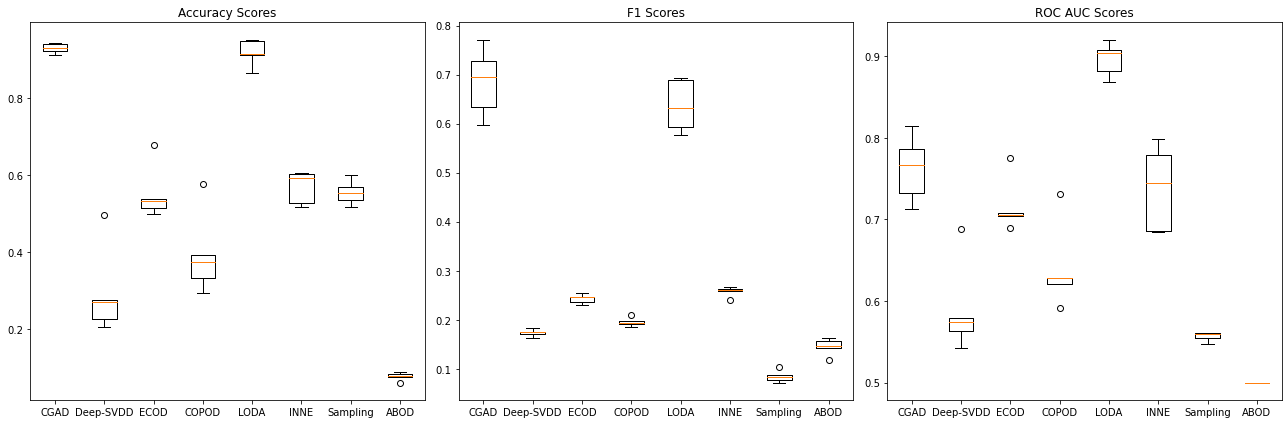

In [155]:
# Create boxplots for each metric
plt.figure(figsize=(18, 6))  # Adjust figure size as needed

plt.subplot(1, 3, 1)
plt.boxplot(acc_box, labels=models)
plt.title("Accuracy Scores")

plt.subplot(1, 3, 2)
plt.boxplot(f1_box, labels=models)
plt.title("F1 Scores")

plt.subplot(1, 3, 3)
plt.boxplot(roc_box, labels=models)
plt.title("ROC AUC Scores")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

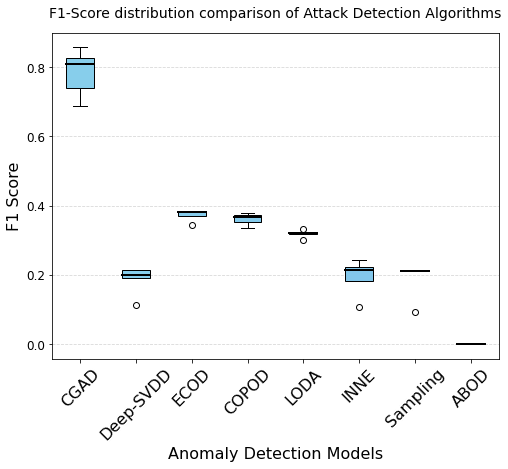

In [393]:
import matplotlib.colors as colors
# Define a visually appealing blue color palette
cmap = colors.LinearSegmentedColormap.from_list("", ["skyblue", "cornflowerblue", "royalblue", "mediumblue", "blue", "darkblue", "midnightblue"])

# Create the boxplot with colors
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
bp = plt.boxplot(f1_box, patch_artist=True, medianprops={"linewidth": 2, "color": "black"}, labels=models)

for box, color in zip(bp['boxes'], cmap(range(len(models)))):
    box.set_facecolor(color)

# Customize the plot
plt.xlabel("Anomaly Detection Models", fontsize=16)
plt.ylabel("F1 Score", fontsize=16)
plt.title("F1-Score distribution comparison of Attack Detection Algorithms", fontsize=14, pad=15)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.savefig("f1_box_wadi.jpg", format="jpeg", dpi = 300, bbox_inches = 'tight' )
plt.show()

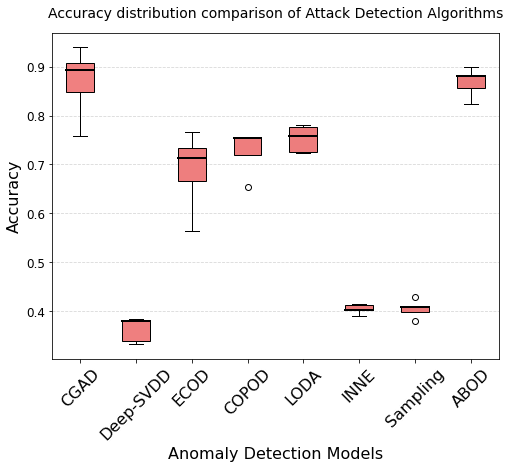

In [394]:
import matplotlib.colors as colors
# Define a visually appealing blue color palette
cmap = colors.LinearSegmentedColormap.from_list("", ["lightcoral", "indianred", "firebrick", "red", "maroon", "darkred", "brown"])


# Create the boxplot with colors
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
bp = plt.boxplot(acc_box, patch_artist=True, medianprops={"linewidth": 2, "color": "black"}, labels=models)

for box, color in zip(bp['boxes'], cmap(range(len(models)))):
    box.set_facecolor(color)

# Customize the plot
plt.xlabel("Anomaly Detection Models", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.title("Accuracy distribution comparison of Attack Detection Algorithms", fontsize=14, pad=15)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.savefig("acc_box_wadi.jpg", format="jpeg", dpi = 300, bbox_inches = 'tight')
plt.show()

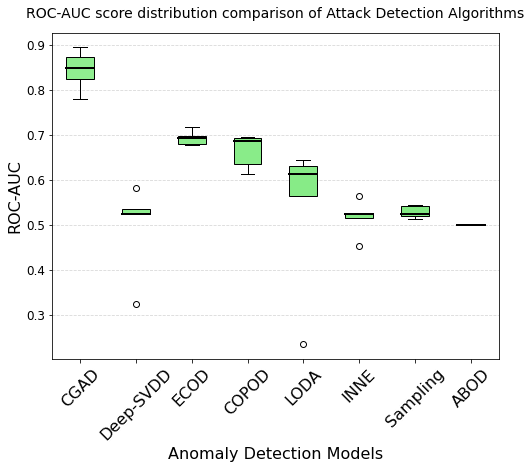

In [395]:
import matplotlib.colors as colors
# Define a visually appealing blue color palette
cmap = colors.LinearSegmentedColormap.from_list("", ["lightgreen", "limegreen", "forestgreen", "seagreen", "darkgreen", "olive", "darkolivegreen"])



# Create the boxplot with colors
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
bp = plt.boxplot(roc_box, patch_artist=True, medianprops={"linewidth": 2, "color": "black"}, labels=models)

for box, color in zip(bp['boxes'], cmap(range(len(models)))):
    box.set_facecolor(color)

# Customize the plot
plt.xlabel("Anomaly Detection Models", fontsize=16)
plt.ylabel("ROC-AUC", fontsize=16)
plt.title("ROC-AUC score distribution comparison of Attack Detection Algorithms", fontsize=14, pad=15)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.savefig("roc_box_wadi.jpg", format="jpeg", dpi = 300, bbox_inches = 'tight')
plt.show()

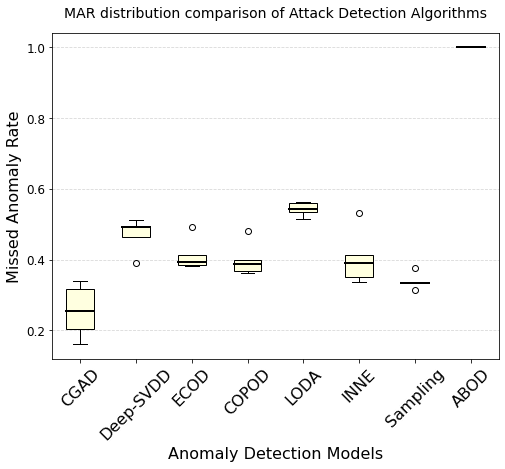

In [433]:
import matplotlib.colors as colors
# Define a visually appealing blue color palette
cmap = colors.LinearSegmentedColormap.from_list("", ["lightyellow", "lemonchiffon", "khaki", "gold", "darkorange"])



# Create the boxplot with colors
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
bp = plt.boxplot(mar_box, patch_artist=True, medianprops={"linewidth": 2, "color": "black"}, labels=models)

for box, color in zip(bp['boxes'], cmap(range(len(models)))):
    box.set_facecolor(color)

# Customize the plot
plt.xlabel("Anomaly Detection Models", fontsize=16)
plt.ylabel("Missed Anomaly Rate", fontsize=16)
plt.title("MAR distribution comparison of Attack Detection Algorithms", fontsize=14, pad=15)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.savefig("mar_box_wadi.jpg", format="jpeg", dpi = 300, bbox_inches = 'tight')
plt.show()

In [249]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data (replace with your actual file path)
data = pd.read_csv('../SWaT_Dataset/2015/final_csv/attack_data_trainV5.csv',index_col=0).reset_index(drop=True)
data['Timestamp'] = pd.to_datetime(data['Timestamp'])


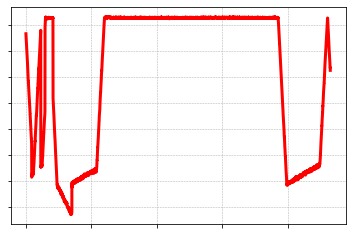

In [250]:
data['Timestamp'] = data['Timestamp'].apply(lambda x:x.value)
# Extract the timestamp and sensor reading columns
timestamps = data["Timestamp"]
sensor_readings = data["LIT101"]



# Create the line plot
plt.plot(sensor_readings[10000:], color="red", linewidth=3)

# Remove y-axis labels and ticks
plt.tick_params(labelbottom=False, labelleft=False)
plt.grid(True, linestyle="--", linewidth=0.5)

# # Add x-axis label
# plt.xlabel("Timestamp")

# # Add title (optional)
# plt.title("Sensor Readings over Time")

# Show the plot
plt.savefig("sensor_reading_Attack.jpg", format="jpeg", dpi=300)
plt.show()

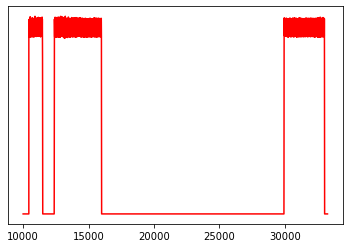

In [206]:
data['Timestamp'] = data['Timestamp'].apply(lambda x:x.value)
# Extract the timestamp and sensor reading columns
timestamps = data["Timestamp"]
sensor_readings = data["FIT101"]



# Create the line plot
plt.plot(sensor_readings[10000:], color="red")

# Remove y-axis labels and ticks
plt.tick_params(left=False, labelleft=False)

# # Add x-axis label
# plt.xlabel("Timestamp")

# # Add title (optional)
# plt.title("Sensor Readings over Time")

# Show the plot
plt.show()

In [251]:
normdata = pd.read_csv('../SWaT_Dataset/2015/final_csv/normal_data_trainV5.csv',index_col=0).reset_index(drop=True)
normdata['Timestamp'] = pd.to_datetime(normdata['Timestamp'])

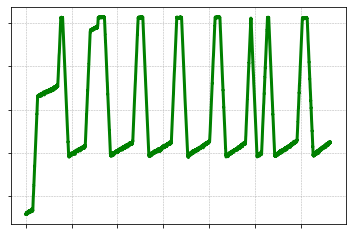

In [252]:
normdata['Timestamp'] = normdata['Timestamp'].apply(lambda x:x.value)
# Extract the timestamp and sensor reading columns
timestamps = normdata["Timestamp"]
normsensor_readings = normdata["LIT101"]



# Create the line plot
plt.plot(normsensor_readings[10000:10000+33254], color="green", linewidth=3)

# Remove y-axis labels and ticks
plt.tick_params(labelleft=False, labelbottom=False)
plt.grid(True, linestyle="--", linewidth=0.5)

# # Add x-axis label
# plt.xlabel("Timestamp")

# # Add title (optional)
# plt.title("Sensor Readings over Time")

# Show the plot
plt.savefig("sensor_reading_normal.jpg", format="jpeg", dpi=300)
plt.show()

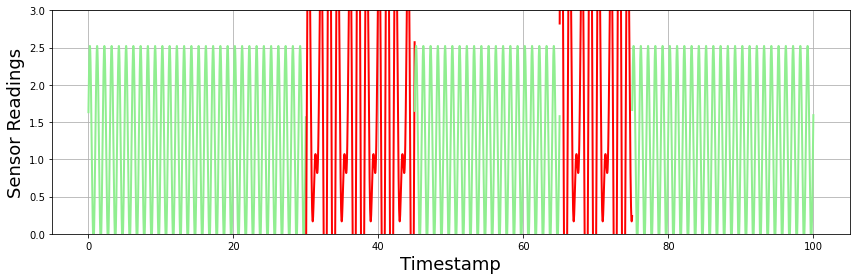

In [182]:
import matplotlib.pyplot as plt
import numpy as np

# Generate ECG-like signal data
t = np.linspace(0, 200, 20000)  # Increase data points for even more readings per second
signal = 1.5 * np.sin(2 * np.pi * t) + 0.5 * np.sin(2 * np.pi * t + np.pi/1.5)+1.2
att_signal = 2 * np.sin(2 * np.pi * t) + 2.5 * np.sin(1.5 * np.pi * t + np.pi/1.5)+1.5

# Create line plot with blue starting and red middle section
plt.figure(figsize=(12, 4))
plt.plot(t[:3000], signal[:3000], color="lightgreen", linewidth=2)  # Blue for first 3000 points, thicker line
plt.plot(t[3000:4500], att_signal[3000:4500], color="red", linewidth=2)  # Red for middle 3000 points, thicker line
plt.plot(t[4500:6500], signal[4500:6500], color="lightgreen", linewidth=2)  # Blue for remaining points, thicker line
plt.plot(t[6500:7500], att_signal[6500:7500], color="red", linewidth=2)
plt.plot(t[7500:10000], signal[7500:10000], color="lightgreen", linewidth=2)

# Customize plot
plt.xlabel("Timestamp", fontsize=18)
plt.ylabel("Sensor Readings", fontsize=18)
# plt.title("WTN Sensor Readings", fontsize=14)
plt.grid(True)

# Adjust y-axis limits for visual appeal
plt.ylim(0, 3)

# Show plot
plt.tight_layout()
plt.savefig("test_data_signal.jpg", format="jpeg", dpi=300)
plt.show()